# Recognizing Human Activities using Smartphones
## Classification on Smartphone-Based Recognition of Human Activities and Postural Transitions Dataset

### Preliminary Exploratory Data Analysis & Methods

In [1]:
# First, we will load required packages
library(repr)
library(knitr)
library(tidyverse)
library(tidymodels)
library(RColorBrewer)
library(GGally)

# Then, set the seed
set.seed(1)

Warning message:
“package ‘knitr’ was built under R version 4.0.1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ broom     0.7.0      ✔ recipes   0.1.13
✔ dials     0.0.9      ✔ rsample   0.0.7 
✔ infer     0.5.4      ✔ tune      0.1

### I. Demonstrate that the dataset can be read from the web into R

In [2]:
# Data source: http://archive.ics.uci.edu/ml/datasets/Smartphone-Based+Recognition+of+Human+Activities+and+Postural+Transitions#
url <- "http://archive.ics.uci.edu/ml/machine-learning-databases/00341/HAPT%20Data%20Set.zip"

# Specifying destination where file should be saved
destfile <- "data/localfile.zip"

# Apply download.file function 
download.file(url, destfile)

unzip ("data/localfile.zip", exdir = "data/")

### II. Clean and wrangle data into a tidy format

In [3]:
# create a vector of features to use for col names of training data
#X1 represents the row number
#X2 is the features 
features_table <- read_delim("data/UCI HAR Dataset/features.txt", delim = " ", col_names = FALSE)
glimpse(features_table)
features_vector <- dplyr::pull(features_table, 'X2')
features_vector_sub <- gsub("-", "_", features_vector)

features_vector_sub <- gsub("[()]", "", features_vector_sub)
glimpse(features_vector_sub)

Parsed with column specification:
cols(
  X1 = col_double(),
  X2 = col_character()
)



Rows: 561
Columns: 2
$ X1 <dbl> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,…
$ X2 <chr> "tBodyAcc-mean()-X", "tBodyAcc-mean()-Y", "tBodyAcc-mean()-Z", "tB…
 chr [1:561] "tBodyAcc_mean_X" "tBodyAcc_mean_Y" "tBodyAcc_mean_Z" ...


In [4]:
# create a table of activity labels to add such a variable as a column into the training set data frame.
label_col_name_vec <- c('activity_label')
y_training_label <- read_delim("data/UCI HAR Dataset/train/y_train.txt", delim = " ", col_names = label_col_name_vec) 

y_testing_label <- read_delim("data/UCI HAR Dataset/test/y_test.txt", delim = " ", col_names = label_col_name_vec)

Parsed with column specification:
cols(
  activity_label = col_double()
)

Parsed with column specification:
cols(
  activity_label = col_double()
)



In [5]:
# read feature values 
x_training_data <- read_delim("data/UCI HAR Dataset/train/X_train.txt", delim = " ", col_names = features_vector_sub)

x_testing_data <- read_delim("data/UCI HAR Dataset/test/X_test.txt", delim = " ", col_names = features_vector_sub)

Warning message:
“Duplicated column names deduplicated: 'fBodyAcc_bandsEnergy_1,8' => 'fBodyAcc_bandsEnergy_1,8_1' [317], 'fBodyAcc_bandsEnergy_9,16' => 'fBodyAcc_bandsEnergy_9,16_1' [318], 'fBodyAcc_bandsEnergy_17,24' => 'fBodyAcc_bandsEnergy_17,24_1' [319], 'fBodyAcc_bandsEnergy_25,32' => 'fBodyAcc_bandsEnergy_25,32_1' [320], 'fBodyAcc_bandsEnergy_33,40' => 'fBodyAcc_bandsEnergy_33,40_1' [321], 'fBodyAcc_bandsEnergy_41,48' => 'fBodyAcc_bandsEnergy_41,48_1' [322], 'fBodyAcc_bandsEnergy_49,56' => 'fBodyAcc_bandsEnergy_49,56_1' [323], 'fBodyAcc_bandsEnergy_57,64' => 'fBodyAcc_bandsEnergy_57,64_1' [324], 'fBodyAcc_bandsEnergy_1,16' => 'fBodyAcc_bandsEnergy_1,16_1' [325], 'fBodyAcc_bandsEnergy_17,32' => 'fBodyAcc_bandsEnergy_17,32_1' [326], 'fBodyAcc_bandsEnergy_33,48' => 'fBodyAcc_bandsEnergy_33,48_1' [327], 'fBodyAcc_bandsEnergy_49,64' => 'fBodyAcc_bandsEnergy_49,64_1' [328], 'fBodyAcc_bandsEnergy_1,24' => 'fBodyAcc_bandsEnergy_1,24_1' [329], 'fBodyAcc_bandsEnergy_25,48' => 'fBodyAcc_ba

In [6]:
# add activity label column to data
training_set_all <- bind_cols(x_training_data, y_training_label)
tail(training_set_all)

testing_set_all <- bind_cols(x_testing_data, y_testing_label)
tail(testing_set_all)

tBodyAcc_mean_X,tBodyAcc_mean_Y,tBodyAcc_mean_Z,tBodyAcc_std_X,tBodyAcc_std_Y,tBodyAcc_std_Z,tBodyAcc_mad_X,tBodyAcc_mad_Y,tBodyAcc_mad_Z,tBodyAcc_max_X,⋯,fBodyBodyGyroJerkMag_skewness,fBodyBodyGyroJerkMag_kurtosis,"angletBodyAccMean,gravity","angletBodyAccJerkMean,gravityMean","angletBodyGyroMean,gravityMean","angletBodyGyroJerkMean,gravityMean","angleX,gravityMean","angleY,gravityMean","angleZ,gravityMean",activity_label
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
2.3796648e-001,-1.0878070e-003,-1.4832590e-001,-2.1894876e-001,-1.2926748e-002,1.7001874e-001,-3.0959929e-001,-4.1392263e-002,2.0745436e-001,2.1079544e-001,⋯,-5.9248831e-001,-8.6723607e-001,3.5277575e-001,-6.0481685e-001,-7.7478312e-001,7.3014246e-001,-7.9727183e-001,2.3499575e-001,4.8907023e-002,2
2.9966534e-001,-5.7193414e-002,-1.8123302e-001,-1.9538652e-001,3.9904850e-002,7.7078081e-002,-2.8230064e-001,4.3615631e-002,6.0410083e-002,2.1079544e-001,⋯,-5.8843274e-001,-8.8032443e-001,-1.9043686e-001,8.2971842e-001,2.0697215e-001,-4.2561858e-001,-7.9188305e-001,2.3860439e-001,4.9819139e-002,2
2.7385271e-001,-7.7493259e-003,-1.4746837e-001,-2.3530853e-001,4.8162805e-003,5.9279994e-002,-3.2255234e-001,-2.9456250e-002,8.0585116e-002,1.1744028e-001,⋯,-3.9073832e-001,-6.8074445e-001,6.4906712e-002,8.7567905e-001,-8.7903279e-001,4.0021936e-001,-7.7183960e-001,2.5267595e-001,5.0052558e-002,2
2.7338737e-001,-1.7010616e-002,-4.5021828e-002,-2.1821818e-001,-1.0382198e-001,2.7453270e-001,-3.0451515e-001,-9.8913034e-002,3.3258449e-001,4.3998772e-002,⋯,2.5145333e-002,-3.0402936e-001,5.2805928e-002,-2.6672437e-001,8.6440401e-001,7.0116882e-001,-7.7913261e-001,2.4914484e-001,4.0811188e-002,2
2.8965416e-001,-1.8843044e-002,-1.5828059e-001,-2.1913944e-001,-1.1141169e-001,2.6889320e-001,-3.1048749e-001,-6.8200325e-002,3.1947326e-001,1.0170184e-001,⋯,6.3906883e-002,-3.4431361e-001,-1.0136012e-001,7.0073969e-001,9.3667394e-001,-5.8947895e-001,-7.8518142e-001,2.4643223e-001,2.5339478e-002,2
3.5150347e-001,-1.2423118e-002,-2.0386717e-001,-2.6927044e-001,-8.7211541e-002,1.7740393e-001,-3.7740405e-001,-3.8678063e-002,2.2942952e-001,2.6901269e-001,⋯,-3.8705200e-001,-7.4073820e-001,-2.8008805e-001,-7.7392783e-003,-5.6087594e-002,-6.1695645e-001,-7.8326693e-001,2.4680852e-001,3.6694843e-002,2


tBodyAcc_mean_X,tBodyAcc_mean_Y,tBodyAcc_mean_Z,tBodyAcc_std_X,tBodyAcc_std_Y,tBodyAcc_std_Z,tBodyAcc_mad_X,tBodyAcc_mad_Y,tBodyAcc_mad_Z,tBodyAcc_max_X,⋯,fBodyBodyGyroJerkMag_skewness,fBodyBodyGyroJerkMag_kurtosis,"angletBodyAccMean,gravity","angletBodyAccJerkMean,gravityMean","angletBodyGyroMean,gravityMean","angletBodyGyroJerkMean,gravityMean","angleX,gravityMean","angleY,gravityMean","angleZ,gravityMean",activity_label
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
1.9227459e-001,-3.3642566e-002,-1.0594911e-001,-3.5484079e-001,-9.2504346e-002,-3.1290968e-001,-4.3357927e-001,-8.8741465e-002,-3.3605968e-001,-4.1623509e-002,⋯,-6.2965677e-001,-9.1649344e-001,5.3598268e-001,6.8930613e-001,-9.3660649e-001,5.6237487e-001,-6.4675433e-001,2.8215019e-001,1.8115158e-001,2
3.1015462e-001,-5.3391250e-002,-9.9108716e-002,-2.8786635e-001,-1.4058918e-001,-2.1508773e-001,-3.5608315e-001,-1.4877483e-001,-2.3205733e-001,1.8536146e-001,⋯,-3.7627777e-001,-7.5080906e-001,-3.3742157e-001,3.4629489e-001,8.8490383e-001,-6.9888508e-001,-6.5173235e-001,2.7462678e-001,1.8478430e-001,2
3.6338465e-001,-3.9214016e-002,-1.0591509e-001,-3.0538795e-001,2.8147742e-002,-1.9637291e-001,-3.7353982e-001,-3.0036042e-002,-2.7023668e-001,1.8536146e-001,⋯,-3.2041786e-001,-7.0027424e-001,-7.3670095e-001,-3.7288894e-001,-6.5742051e-001,3.2254850e-001,-6.5518092e-001,2.7357825e-001,1.8241215e-001,2
3.4996609e-001,3.0077442e-002,-1.1578796e-001,-3.2963808e-001,-4.2142894e-002,-2.5018068e-001,-3.8801695e-001,-1.3325698e-001,-3.4702897e-001,7.4714557e-003,⋯,-1.1885353e-001,-4.6717918e-001,-1.8156041e-001,8.8574068e-002,6.9666350e-001,3.6313871e-001,-6.5535684e-001,2.7447878e-001,1.8118355e-001,2
2.3759383e-001,1.8466870e-002,-9.6498932e-002,-3.2311431e-001,-2.2977539e-001,-2.0757363e-001,-3.9238016e-001,-2.7961019e-001,-2.8947740e-001,7.4714557e-003,⋯,-2.0544513e-001,-6.1773651e-001,4.4455767e-001,-8.1918771e-001,9.2929414e-001,-8.3982494e-003,-6.5971859e-001,2.6478161e-001,1.8756291e-001,2
1.5362719e-001,-1.8436506e-002,-1.3701846e-001,-3.3004597e-001,-1.9525335e-001,-1.6433879e-001,-4.3097381e-001,-2.1829465e-001,-2.2993287e-001,-1.1152697e-001,⋯,-7.2237101e-002,-4.3694001e-001,5.9880823e-001,-2.8795067e-001,8.7602991e-001,-2.4965139e-002,-6.6008023e-001,2.6393619e-001,1.8810340e-001,2


In [7]:
# combine all the data into one
bothdfs <- rbind(training_set_all, testing_set_all) %>%
      mutate(activity_label = as_factor(activity_label), 
            across(tBodyAcc_mean_X:fBodyBodyGyroJerkMag_skewness, as.numeric)) %>% 
      na.omit()
tail(bothdfs)

tBodyAcc_mean_X,tBodyAcc_mean_Y,tBodyAcc_mean_Z,tBodyAcc_std_X,tBodyAcc_std_Y,tBodyAcc_std_Z,tBodyAcc_mad_X,tBodyAcc_mad_Y,tBodyAcc_mad_Z,tBodyAcc_max_X,⋯,fBodyBodyGyroJerkMag_skewness,fBodyBodyGyroJerkMag_kurtosis,"angletBodyAccMean,gravity","angletBodyAccJerkMean,gravityMean","angletBodyGyroMean,gravityMean","angletBodyGyroJerkMean,gravityMean","angleX,gravityMean","angleY,gravityMean","angleZ,gravityMean",activity_label
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<fct>
0.1922746,-0.03364257,-0.10594911,-0.3548408,-0.09250435,-0.3129097,-0.4335793,-0.08874147,-0.3360597,-0.041623509,⋯,-0.6296568,-9.1649344e-001,5.3598268e-001,6.8930613e-001,-9.3660649e-001,5.6237487e-001,-6.4675433e-001,2.8215019e-001,1.8115158e-001,2
0.3101546,-0.05339125,-0.09910872,-0.2878663,-0.14058918,-0.2150877,-0.3560832,-0.14877483,-0.2320573,0.185361460,⋯,-0.3762778,-7.5080906e-001,-3.3742157e-001,3.4629489e-001,8.8490383e-001,-6.9888508e-001,-6.5173235e-001,2.7462678e-001,1.8478430e-001,2
0.3633846,-0.03921402,-0.10591509,-0.3053880,0.02814774,-0.1963729,-0.3735398,-0.03003604,-0.2702367,0.185361460,⋯,-0.3204179,-7.0027424e-001,-7.3670095e-001,-3.7288894e-001,-6.5742051e-001,3.2254850e-001,-6.5518092e-001,2.7357825e-001,1.8241215e-001,2
0.3499661,0.03007744,-0.11578796,-0.3296381,-0.04214289,-0.2501807,-0.3880170,-0.13325698,-0.3470290,0.007471456,⋯,-0.1188535,-4.6717918e-001,-1.8156041e-001,8.8574068e-002,6.9666350e-001,3.6313871e-001,-6.5535684e-001,2.7447878e-001,1.8118355e-001,2
0.2375938,0.01846687,-0.09649893,-0.3231143,-0.22977539,-0.2075736,-0.3923802,-0.27961019,-0.2894774,0.007471456,⋯,-0.2054451,-6.1773651e-001,4.4455767e-001,-8.1918771e-001,9.2929414e-001,-8.3982494e-003,-6.5971859e-001,2.6478161e-001,1.8756291e-001,2
0.1536272,-0.01843651,-0.13701846,-0.3300460,-0.19525335,-0.1643388,-0.4309738,-0.21829465,-0.2299329,-0.111526970,⋯,-0.0722371,-4.3694001e-001,5.9880823e-001,-2.8795067e-001,8.7602991e-001,-2.4965139e-002,-6.6008023e-001,2.6393619e-001,1.8810340e-001,2


Our dataset is tidy because each row is a single observation, each column is a single variable, and each value is a single cell.

In [8]:
# random spliting of the combined entire dataset into train (75%) and test (25%)
bothdfs_split <- initial_split(bothdfs, prop = 0.75, strata = activity_label)
activity_train <- training(bothdfs_split) 
activity_test <- testing(bothdfs_split) 

In [9]:
#view column/feature names
names(bothdfs)

[1] "tBodyAcc_mean_X"                    "tBodyAcc_mean_Y"                   
  [3] "tBodyAcc_mean_Z"                    "tBodyAcc_std_X"                    
  [5] "tBodyAcc_std_Y"                     "tBodyAcc_std_Z"                    
  [7] "tBodyAcc_mad_X"                     "tBodyAcc_mad_Y"                    
  [9] "tBodyAcc_mad_Z"                     "tBodyAcc_max_X"                    
 [11] "tBodyAcc_max_Y"                     "tBodyAcc_max_Z"                    
 [13] "tBodyAcc_min_X"                     "tBodyAcc_min_Y"                    
 [15] "tBodyAcc_min_Z"                     "tBodyAcc_sma"                      
 [17] "tBodyAcc_energy_X"                  "tBodyAcc_energy_Y"                 
 [19] "tBodyAcc_energy_Z"                  "tBodyAcc_iqr_X"                    
 [21] "tBodyAcc_iqr_Y"                     "tBodyAcc_iqr_Z"                    
 [23] "tBodyAcc_entropy_X"                 "tBodyAcc_entropy_Y"                
 [25] "tBodyAcc_entropy_Z"                 "tBodyAcc_arCoeff_X,1"              
 [27] "tBodyAcc_arCoeff_X,2"               "tBodyAcc_arCoeff_X,3"              
 [29] "tBodyAcc_arCoeff_X,4"               "tBodyAcc_arCoeff_Y,1"              
 [31] "tBodyAcc_arCoeff_Y,2"               "tBodyAcc_arCoeff_Y,3"              
 [33] "tBodyAcc_arCoeff_Y,4"               "tBodyAcc_arCoeff_Z,1"              
 [35] "tBodyAcc_arCoeff_Z,2"               "tBodyAcc_arCoeff_Z,3"              
 [37] "tBodyAcc_arCoeff_Z,4"               "tBodyAcc_correlation_X,Y"          
 [39] "tBodyAcc_correlation_X,Z"           "tBodyAcc_correlation_Y,Z"          
 [41] "tGravityAcc_mean_X"                 "tGravityAcc_mean_Y"                
 [43] "tGravityAcc_mean_Z"                 "tGravityAcc_std_X"                 
 [45] "tGravityAcc_std_Y"                  "tGravityAcc_std_Z"                 
 [47] "tGravityAcc_mad_X"                  "tGravityAcc_mad_Y"                 
 [49] "tGravityAcc_mad_Z"                  "tGravityAcc_max_X"                 
 [51] "tGravityAcc_max_Y"                  "tGravityAcc_max_Z"                 
 [53] "tGravityAcc_min_X"                  "tGravityAcc_min_Y"                 
 [55] "tGravityAcc_min_Z"                  "tGravityAcc_sma"                   
 [57] "tGravityAcc_energy_X"               "tGravityAcc_energy_Y"              
 [59] "tGravityAcc_energy_Z"               "tGravityAcc_iqr_X"                 
 [61] "tGravityAcc_iqr_Y"                  "tGravityAcc_iqr_Z"                 
 [63] "tGravityAcc_entropy_X"              "tGravityAcc_entropy_Y"             
 [65] "tGravityAcc_entropy_Z"              "tGravityAcc_arCoeff_X,1"           
 [67] "tGravityAcc_arCoeff_X,2"            "tGravityAcc_arCoeff_X,3"           
 [69] "tGravityAcc_arCoeff_X,4"            "tGravityAcc_arCoeff_Y,1"           
 [71] "tGravityAcc_arCoeff_Y,2"            "tGravityAcc_arCoeff_Y,3"           
 [73] "tGravityAcc_arCoeff_Y,4"            "tGravityAcc_arCoeff_Z,1"           
 [75] "tGravityAcc_arCoeff_Z,2"            "tGravityAcc_arCoeff_Z,3"           
 [77] "tGravityAcc_arCoeff_Z,4"            "tGravityAcc_correlation_X,Y"       
 [79] "tGravityAcc_correlation_X,Z"        "tGravityAcc_correlation_Y,Z"       
 [81] "tBodyAccJerk_mean_X"                "tBodyAccJerk_mean_Y"               
 [83] "tBodyAccJerk_mean_Z"                "tBodyAccJerk_std_X"                
 [85] "tBodyAccJerk_std_Y"                 "tBodyAccJerk_std_Z"                
 [87] "tBodyAccJerk_mad_X"                 "tBodyAccJerk_mad_Y"                
 [89] "tBodyAccJerk_mad_Z"                 "tBodyAccJerk_max_X"                
 [91] "tBodyAccJerk_max_Y"                 "tBodyAccJerk_max_Z"                
 [93] "tBodyAccJerk_min_X"                 "tBodyAccJerk_min_Y"                
 [95] "tBodyAccJerk_min_Z"                 "tBodyAccJerk_sma"                  
 [97] "tBodyAccJerk_energy_X"              "tBodyAccJerk_energy_Y"             
 [99] "tBodyAccJerk_energy_Z"              "tBodyAccJerk_iqr_X"                
[1

Since there are too many features available (561), we will select 5 variables that we hypothesize to be relevant based on previous literature. We will focus on a small subset of all the variables instead of looking at all of them. Then we will examine the variables we have picked using visualization and other techniques.

The 5 variables are: 

1. tGravityAcc_mean_X 
2. tGravityAcc_mean_Y
3. tGravityAcc_min_X 
4. tBodyAccJerk_energy_X 
5. fBodyAcc_mad_X

In [11]:
#Determining correlation of relevant variables proposed from previous research

relevant_acc_columns <- bothdfs %>% 
    select(tGravityAcc_mean_X,tGravityAcc_mean_Y,tGravityAcc_min_X, tBodyAccJerk_energy_X,fBodyAcc_mad_X, activity_label)  
head(relevant_acc_columns)


tGravityAcc_mean_X,tGravityAcc_mean_Y,tGravityAcc_min_X,tBodyAccJerk_energy_X,fBodyAcc_mad_X,activity_label
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
0.9633961,-0.1408397,0.9774363,-0.9999349,-0.9968886,5
0.9665611,-0.1415513,0.9845201,-0.9999597,-0.9978897,5
0.9668781,-0.1420098,0.9867701,-0.9998942,-0.9940974,5
0.9676152,-0.1439765,0.9868210,-0.9999236,-0.9945468,5
0.9682244,-0.1487502,0.9874335,-0.9999692,-0.9977250,5
0.9679482,-0.1482100,0.9877218,-0.9999512,-0.9966048,5


### IV. Plots

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



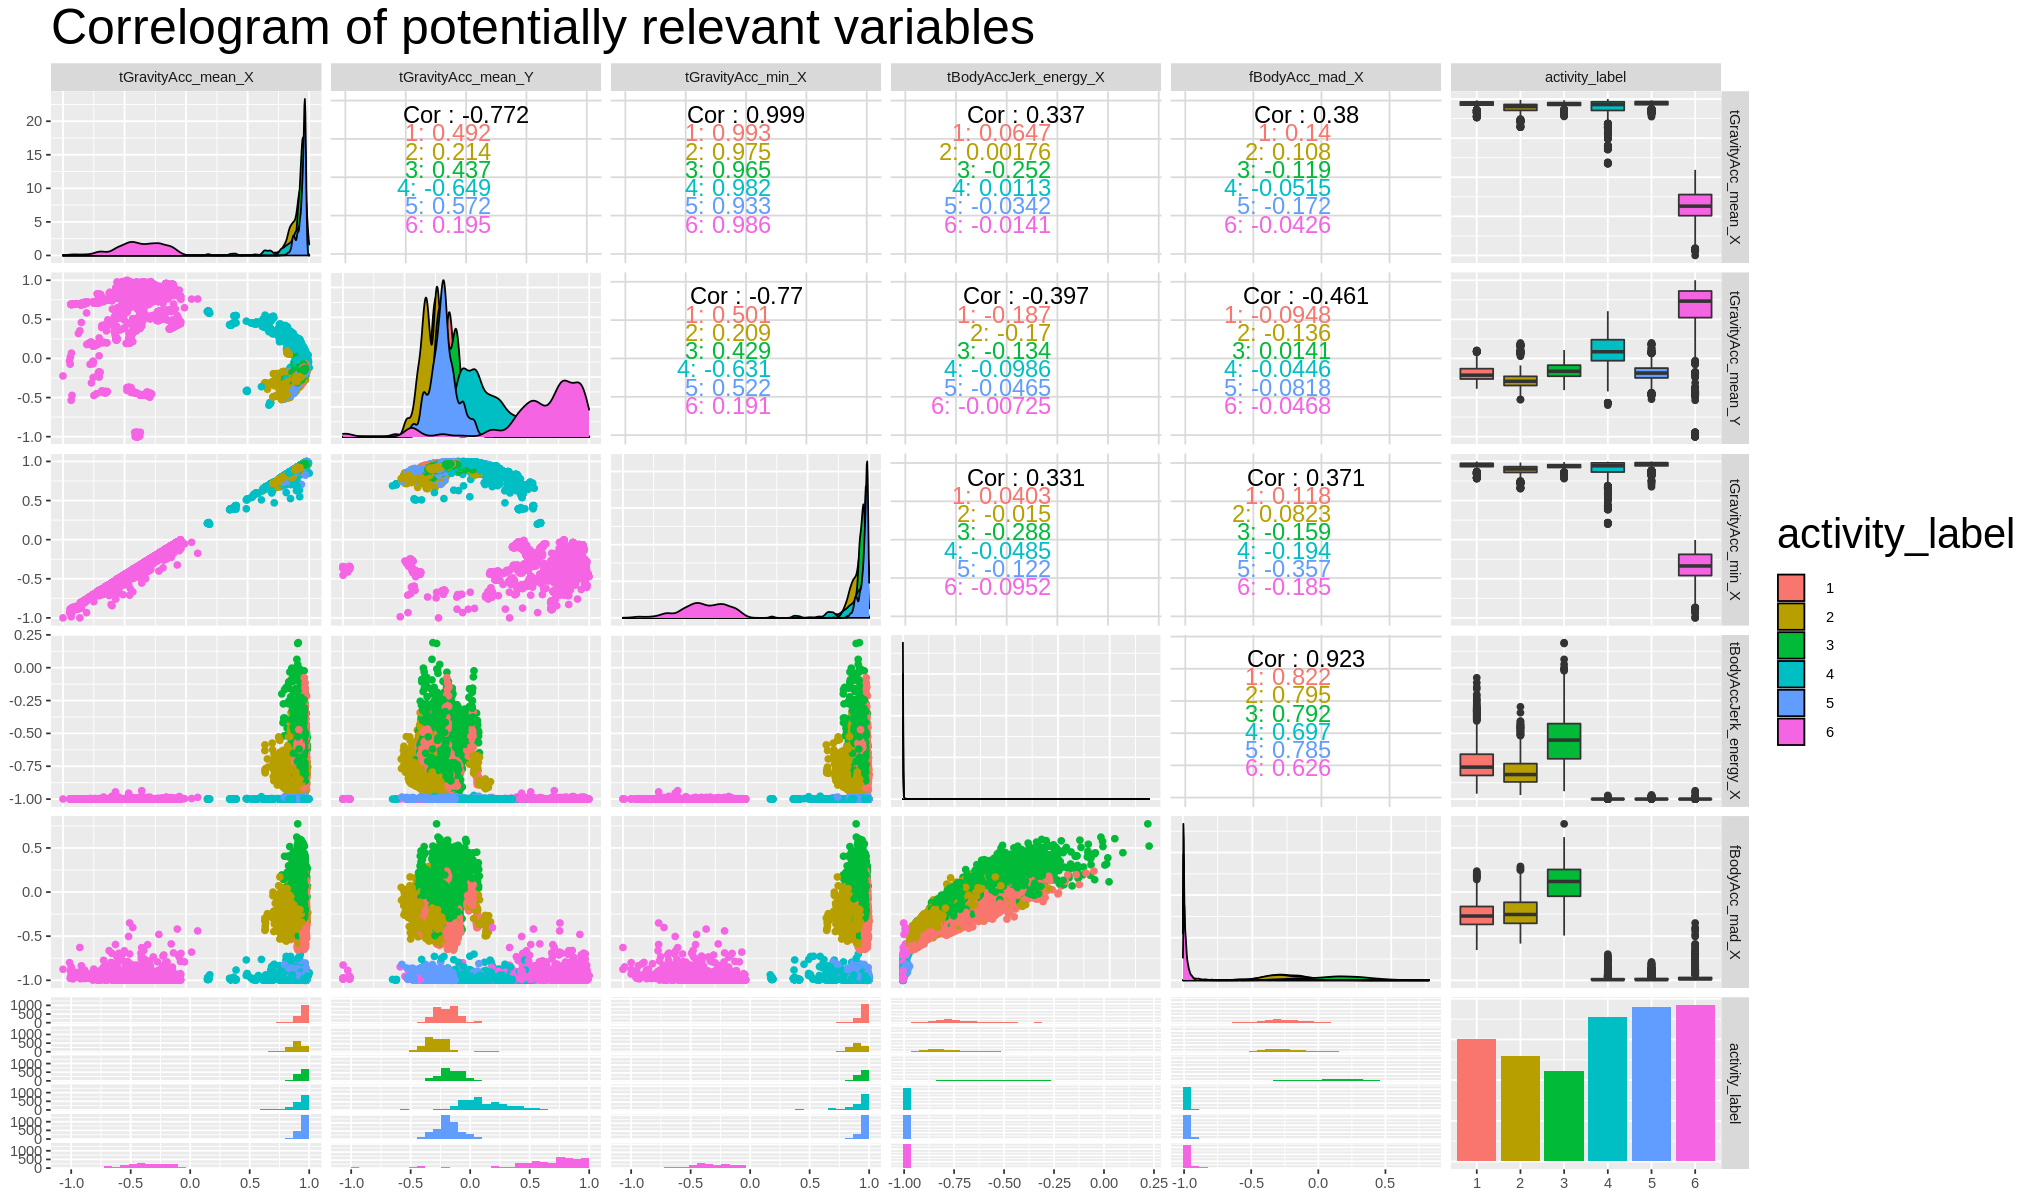

In [43]:
#Correlation graph of 5 features mentioned above 
options(repr.plot.width=17, repr.plot.height=10)

correlation_graph <- ggpairs(relevant_acc_columns, mapping = aes(color = activity_label),
                            legend = 1,
                             title ="Correlogram of potentially relevant variables",
                         upper = list(continuous = wrap("cor", size = 5))) +
                        theme(title = element_text(size = 25))

correlation_graph

The correlation matrix visualization above shows trends and patterns between the five potentially relevant variables that may be used to build the model. The five variables are:

1. tGravityAcc_mean_X ~ mean gravitational acceleration in x-direction (time domain)
2. tGravityAcc_mean_Y ~ mean gravitational acceleration in y-direction (time domain)
3. tGravityAcc_min_X ~ minimum gravitational acceleration in x-direction (time domain) 
4. tBodyAccJerk_energy_X ~ body jerk energy in x-direction (time domain)
5. fBodyAcc_mad_X ~ absolute median body acceleration in x-direction (frequency domain) 

The correlation matrix is coloured according to the activity labels:

1. Walking
2. Walking upstairs
3. Walking downstairs
4. Sitting
5. Standing
6. Laying

**Mean Gravity Acceleration (x-direction) vs Mean Gravity Acceleration (y-direction) Graph**

First, we can see in this graph that activity 6, laying, is clustered on the lower range of the mean gravity acceleration (x-direction) whereas the rest of the activities are clustered on the higher end of the same axis. This is logical because we would expect to see a lower gravitational acceleration of a static movements and a higher gravitational acceleration for more dynamic movements.  This graph also shows that activity 6,laying, has a broader range in the mean gravity acceleration (y-direction) compared to the other activies. This makes sense since the act of laying requires the individual to orient themselves in such a way on the floor that is completely parallel to the floor. 



**Mean Gravity Acceleration vs Minimum Gravitational Acceleration in the x-dimension Graph**

Second, this graph shows a strong positive correlation. Therefore, as the mean gravity acceleration (x-direction) increases, the minimum gravity acceleration (x-direction) increases as well. Once again, we see a clear trend of seeing a lower gravity acceleration for static movements (ie. laying, standing, sitting) and a higher gravity acceleration for dynamic movements (walking, walking upstairs, walking downstairs). 



**Mean Gravity Acceleration vs Body Jerk Energy in the x-dimension Graph**

Thirdly, this graph demonstrates that static movements (ie. laying, standing, sitting) have little to no jerk energy although these static movements vary in mean gravity acceleration. Jerk is the rate of change in acceleration; we expect to see small or no changes in accelerations for static movements. On the other hand, we see dynamic movements (walking, walking upstairs, walking downstairs) have varying jerk energy and higher mean gravity acceleration. This is logical because dynamic movements would cause a greater change in acceleration.



**Mean Gravity Acceleration vs Absolute Median Body Acceleration in the x-dimension Graph**

Fourthly, this graph displays very similar trends to the previous graph. We see that static movements show lower mean gravitational acceleration and its absolue median body acceleration is on a smaller scale compared to dynamic movements. Activities such as walking, walking downstairs and walking upstairs demonstrate a higher mean gravitational acceleration as well as a broader range of absolute median body acceleration. We expect to see a broader range due to the nature of these dynamic movements. 

Warning message in ggcorr(relevant_acc_columns, method = c("everything", "pearson"), :
“data in column(s) 'activity_label' are not numeric and were ignored”


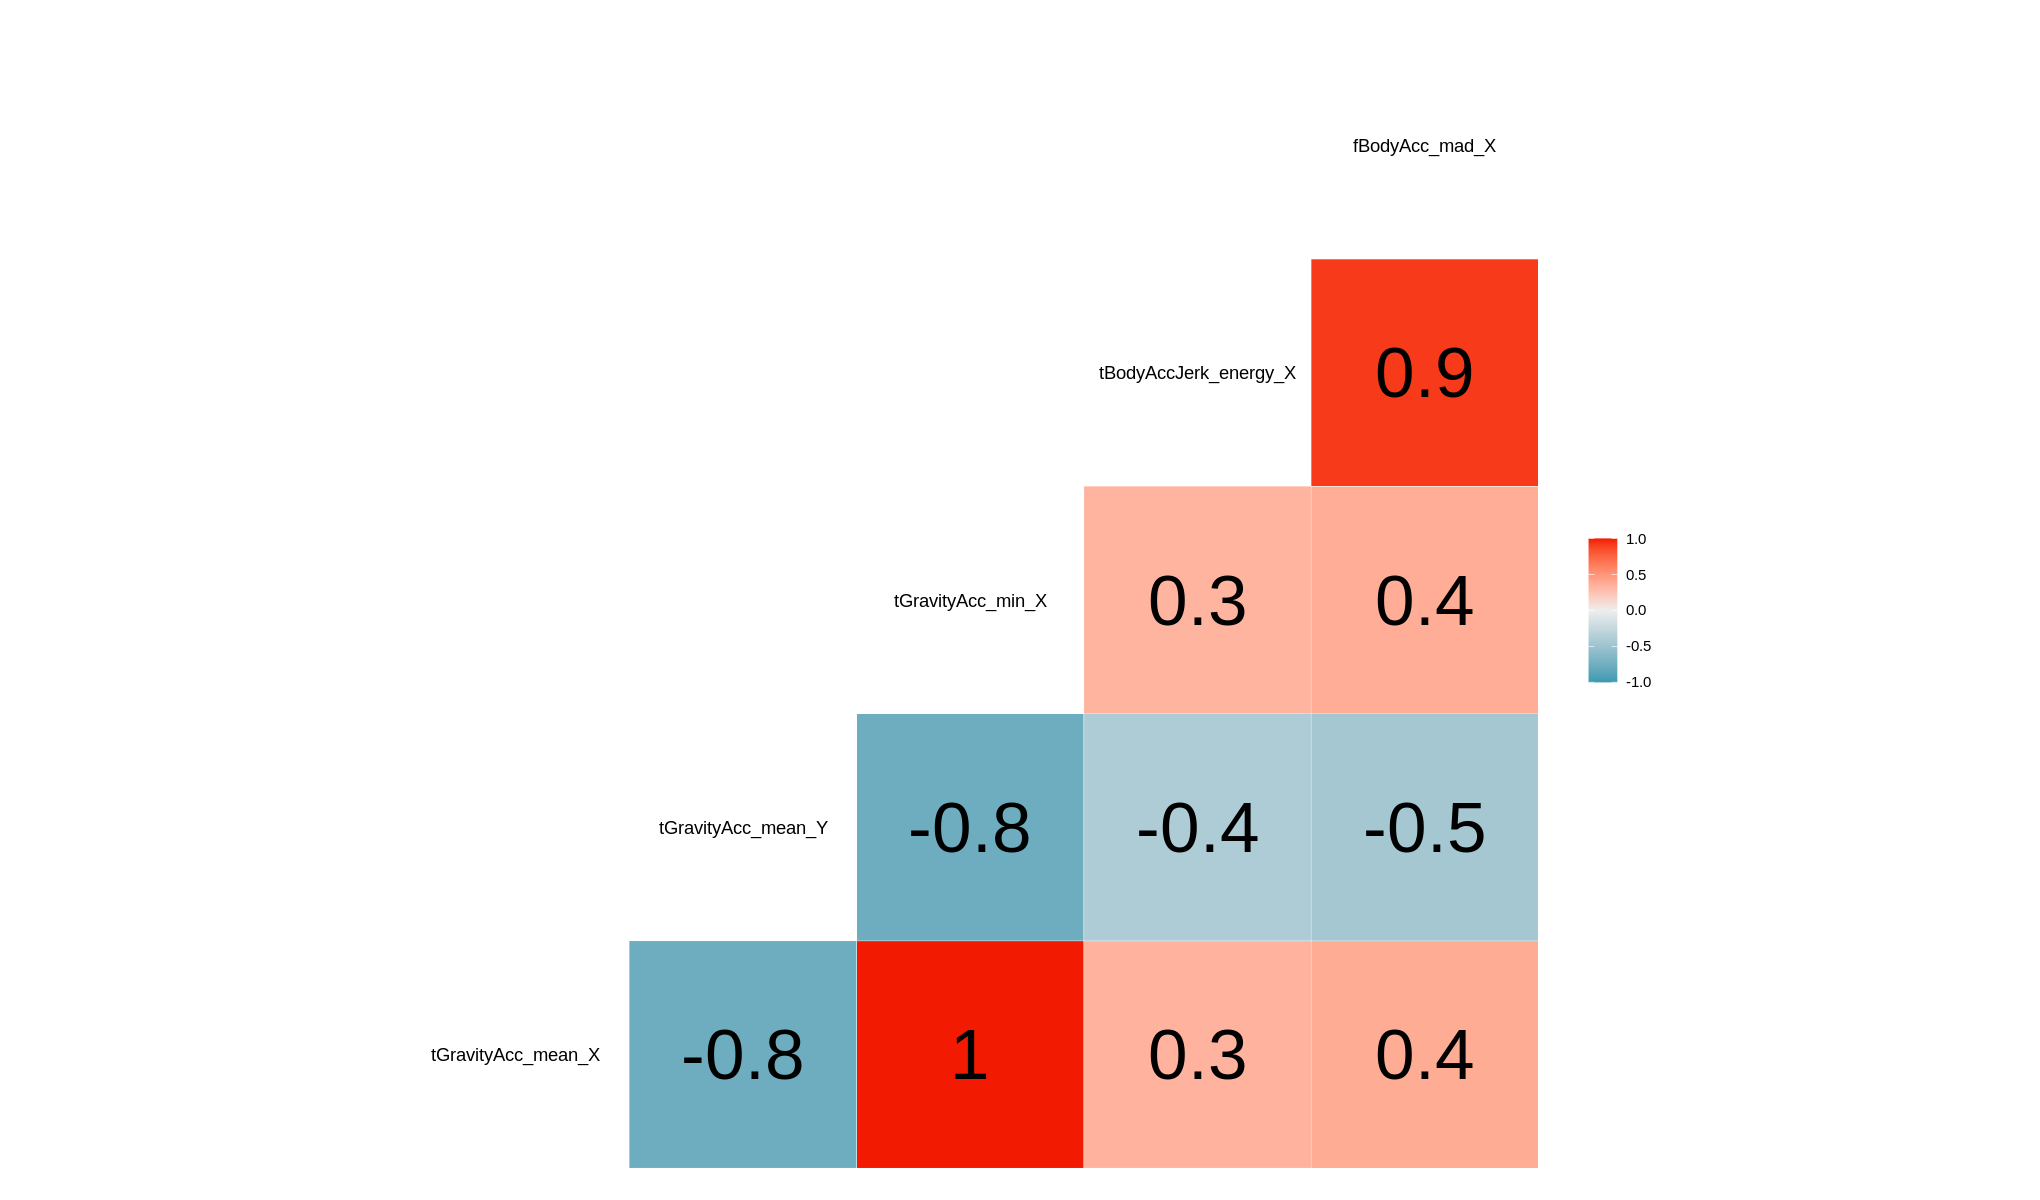

In [41]:
#Visualization correlation between potential predictors
#idk how to add the title
correlation_predictors <- ggcorr(relevant_acc_columns, method = c("everything", "pearson"),
                                label = TRUE, label_size = 15)
correlation_predictors

The above visualization correlation graph is more easier to understand how strongly correlated these predictors are to one another. We can see that there is the body jerk energy and absolute median body acceleration in the x-dimension have a strong positive correlation. We can also see a strong negative correlation between mean gravity acceleration (y-direction) and mean gravity acceleration (x-direction). Therefore, we may encounter a multicollinearity problem using these predictors. 

**Conclusion ~ Using 5 Variables for KNN Classification Model**

Overall, these five variables show definitive patterns that follow the expected physical meanings of these human activities, whether it be static or dynamic. Therefore, the correlation matrix graphs confirms the validity of these 5 variables and will be used as predictors for the KNN classification model. Although we do expect to see a lower accuracy of the model due to multicollinearity. 

In [26]:
#data frame contraining only the 5 variables (from the paper) and the activity labels (training data only). 
training_subset <- activity_train %>%
    select(tGravityAcc_mean_X,tGravityAcc_mean_Y,tGravityAcc_min_X, tBodyAccJerk_energy_X,fBodyAcc_mad_X, activity_label)
  
tail(training_subset)


tGravityAcc_mean_X,tGravityAcc_mean_Y,tGravityAcc_min_X,tBodyAccJerk_energy_X,fBodyAcc_mad_X,activity_label
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
0.9017973,-0.2575576,0.9128043,-0.8446461,-0.3235569,2
0.8968500,-0.2736605,0.9068774,-0.8484333,-0.2621446,2
0.8891608,-0.2875003,0.9034133,-0.8680587,-0.3281814,2
0.8909677,-0.2767180,0.9034133,-0.8273045,-0.2405937,2
0.8912809,-0.2749762,0.9037927,-0.7939383,-0.1819376,2
0.8908972,-0.2761645,0.9037927,-0.8110020,-0.3017432,2


### III. Tables

After splitting the dataset into a train and test set, we selected five variables for our analysis:

The 5 variables are: 

1. tGravityAcc_mean_X 
2. tGravityAcc_mean_Y
3. tGravityAcc_min_X 
4. tBodyAccJerk_energy_X 
5. fBodyAcc_mad_X

We made a table including these variables and calculated the number of rows with missing data - zero. Next, we summarized the training data to inspect the possible scaling and centering; it appears to be already scaled by looking at the min and max values, although we should consider scaling when creating a recipe. Lastly, we calculated the number of observations for each activity to ensure equal proportions to minimize the model’s bias towards one activity.

In [13]:
missing_data <- training_subset %>%
    summarize(missing_data = sum(is.na(training_subset)))

# Table 1: how many rows have missing data
kable(missing_data, caption = "Number of rows with missing data")



Table: Number of rows with missing data

| missing_data|
|------------:|
|            0|

There is no missing data since it was already accounted for when combining the two datasets (train and test set into one)

In [15]:
#Table 2: create summary table of training data
summary(training_subset) 

# We can notice that most of the data has been scaled to have same spread. 
#Though, they are not centered as each variable do not have a mean of 0.

 tGravityAcc_mean_X tGravityAcc_mean_Y tGravityAcc_min_X tBodyAccJerk_energy_X
 Min.   :-1.0000    Min.   :-0.99982   Min.   :-1.0000   Min.   :-1.0000      
 1st Qu.: 0.8063    1st Qu.:-0.23600   1st Qu.: 0.8111   1st Qu.:-0.9999      
 Median : 0.9236    Median :-0.12840   Median : 0.9315   Median :-0.9993      
 Mean   : 0.6549    Mean   : 0.02106   Mean   : 0.6706   Mean   :-0.8756      
 3rd Qu.: 0.9564    3rd Qu.: 0.17664   3rd Qu.: 0.9690   3rd Qu.:-0.7800      
 Max.   : 1.0000    Max.   : 0.98840   Max.   : 0.9980   Max.   : 0.1908      
 fBodyAcc_mad_X    activity_label
 Min.   :-1.0000   1:1133        
 1st Qu.:-0.9925   2: 970        
 Median :-0.9635   3: 837        
 Mean   :-0.6381   4:1329        
 3rd Qu.:-0.2562   5:1429        
 Max.   : 0.7731   6:1443        

In [16]:
# data frame that has been grouped by each activity data
each_activity_data <- training_subset %>%
    group_by(activity_label)

# Number of observations for each activity
count_activity_data <- summarize(each_activity_data, count = n()) 

# Table 3: how many observations for each activity
kable(count_activity_data, caption = "Number of observations for each activity")

`summarise()` ungrouping output (override with `.groups` argument)





Table: Number of observations for each activity

|activity_label | count|
|:--------------|-----:|
|1              |  1133|
|2              |   970|
|3              |   837|
|4              |  1329|
|5              |  1429|
|6              |  1443|

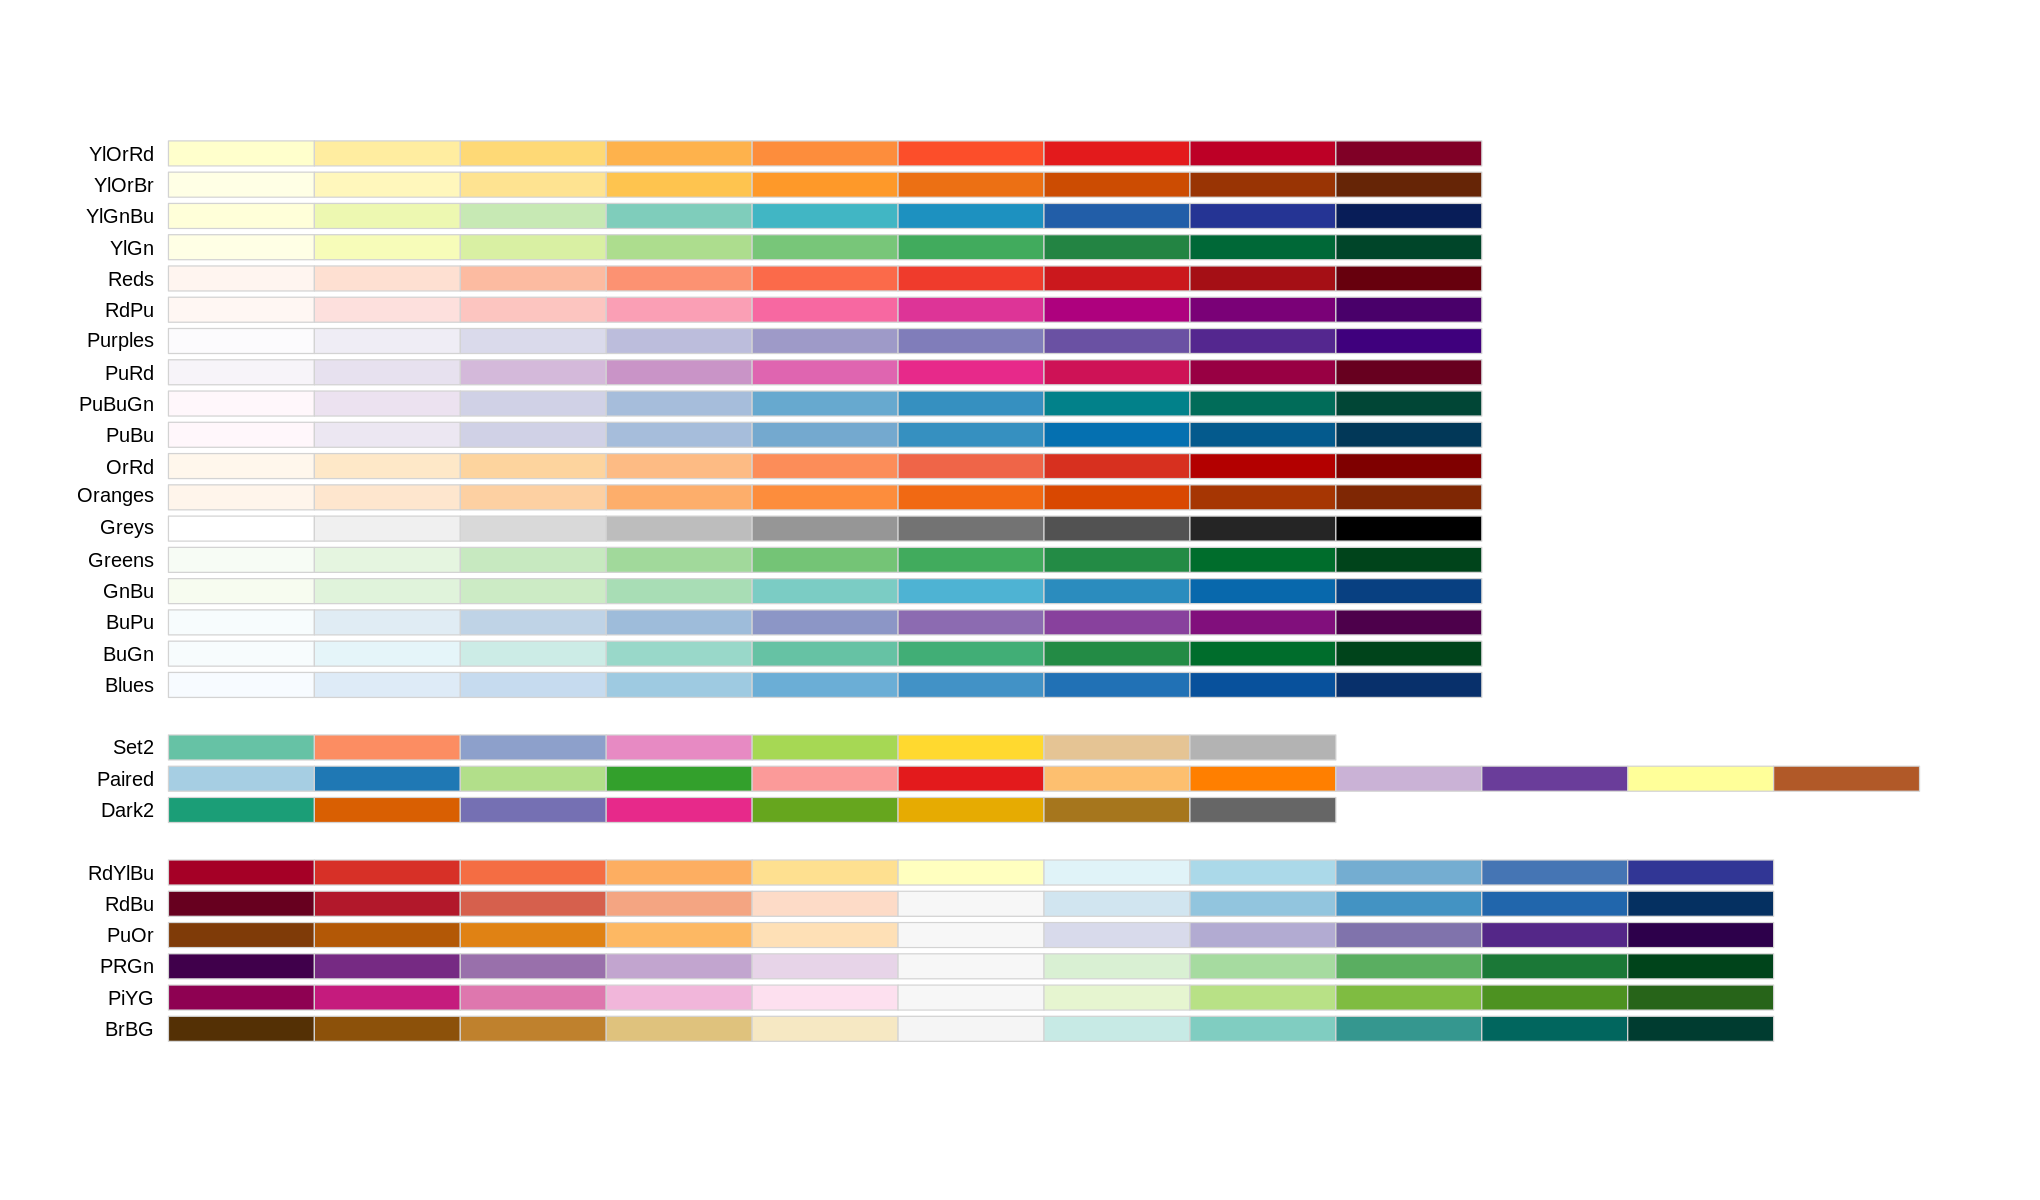

In [17]:
options(repr.plot.width=17, repr.plot.height=10)

# checking colour options to ensure colour blind friendliness of the plots
display.brewer.all(colorblindFriendly = TRUE)

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.



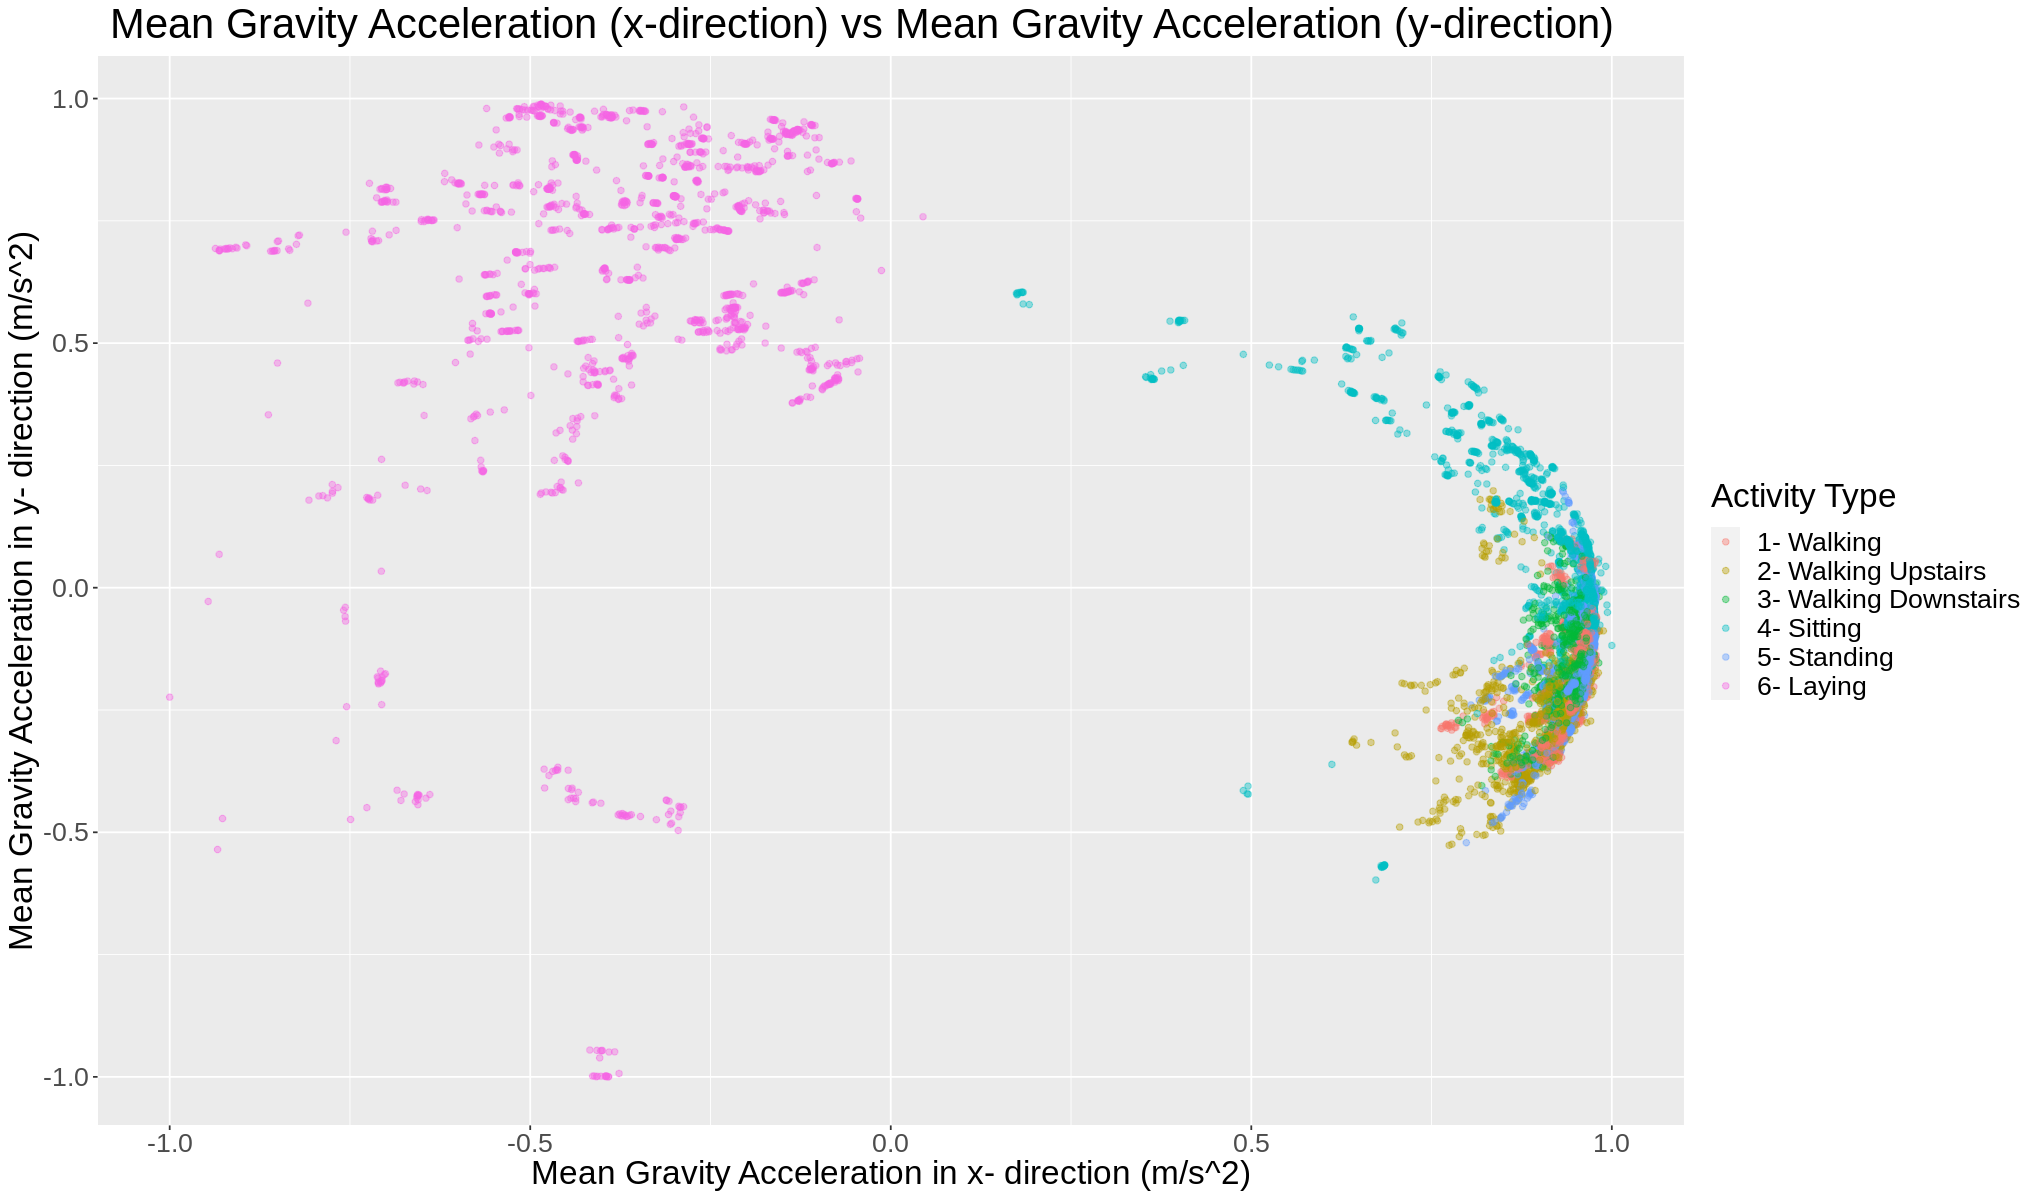

In [23]:
#Using only training data, compares the distribution of each predictor variables

#Plot 1: Mean Gravity Acceleration (x-direction) vs Mean Gravity Acceleration (y-direction)
accl_x_y_plot <- training_subset %>%
  ggplot(aes(x = tGravityAcc_mean_X, y = tGravityAcc_mean_Y, color = activity_label)) +
  ggtitle(" Mean Gravity Acceleration (x-direction) vs Mean Gravity Acceleration (y-direction)") +
  geom_point(alpha = 0.4) +
  labs(x = "Mean Gravity Acceleration in x- direction (m/s^2)", 
       y = "Mean Gravity Acceleration in y- direction (m/s^2)", color = "Activity Type") +
  scale_color_brewer(palette = "Set2") +
  scale_color_discrete(labels = c("1- Walking", "2- Walking Upstairs", "3- Walking Downstairs", "4- Sitting", "5- Standing", "6- Laying")) +
  theme(text = element_text(size = 20), plot.title = element_text(size=25))
accl_x_y_plot

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.



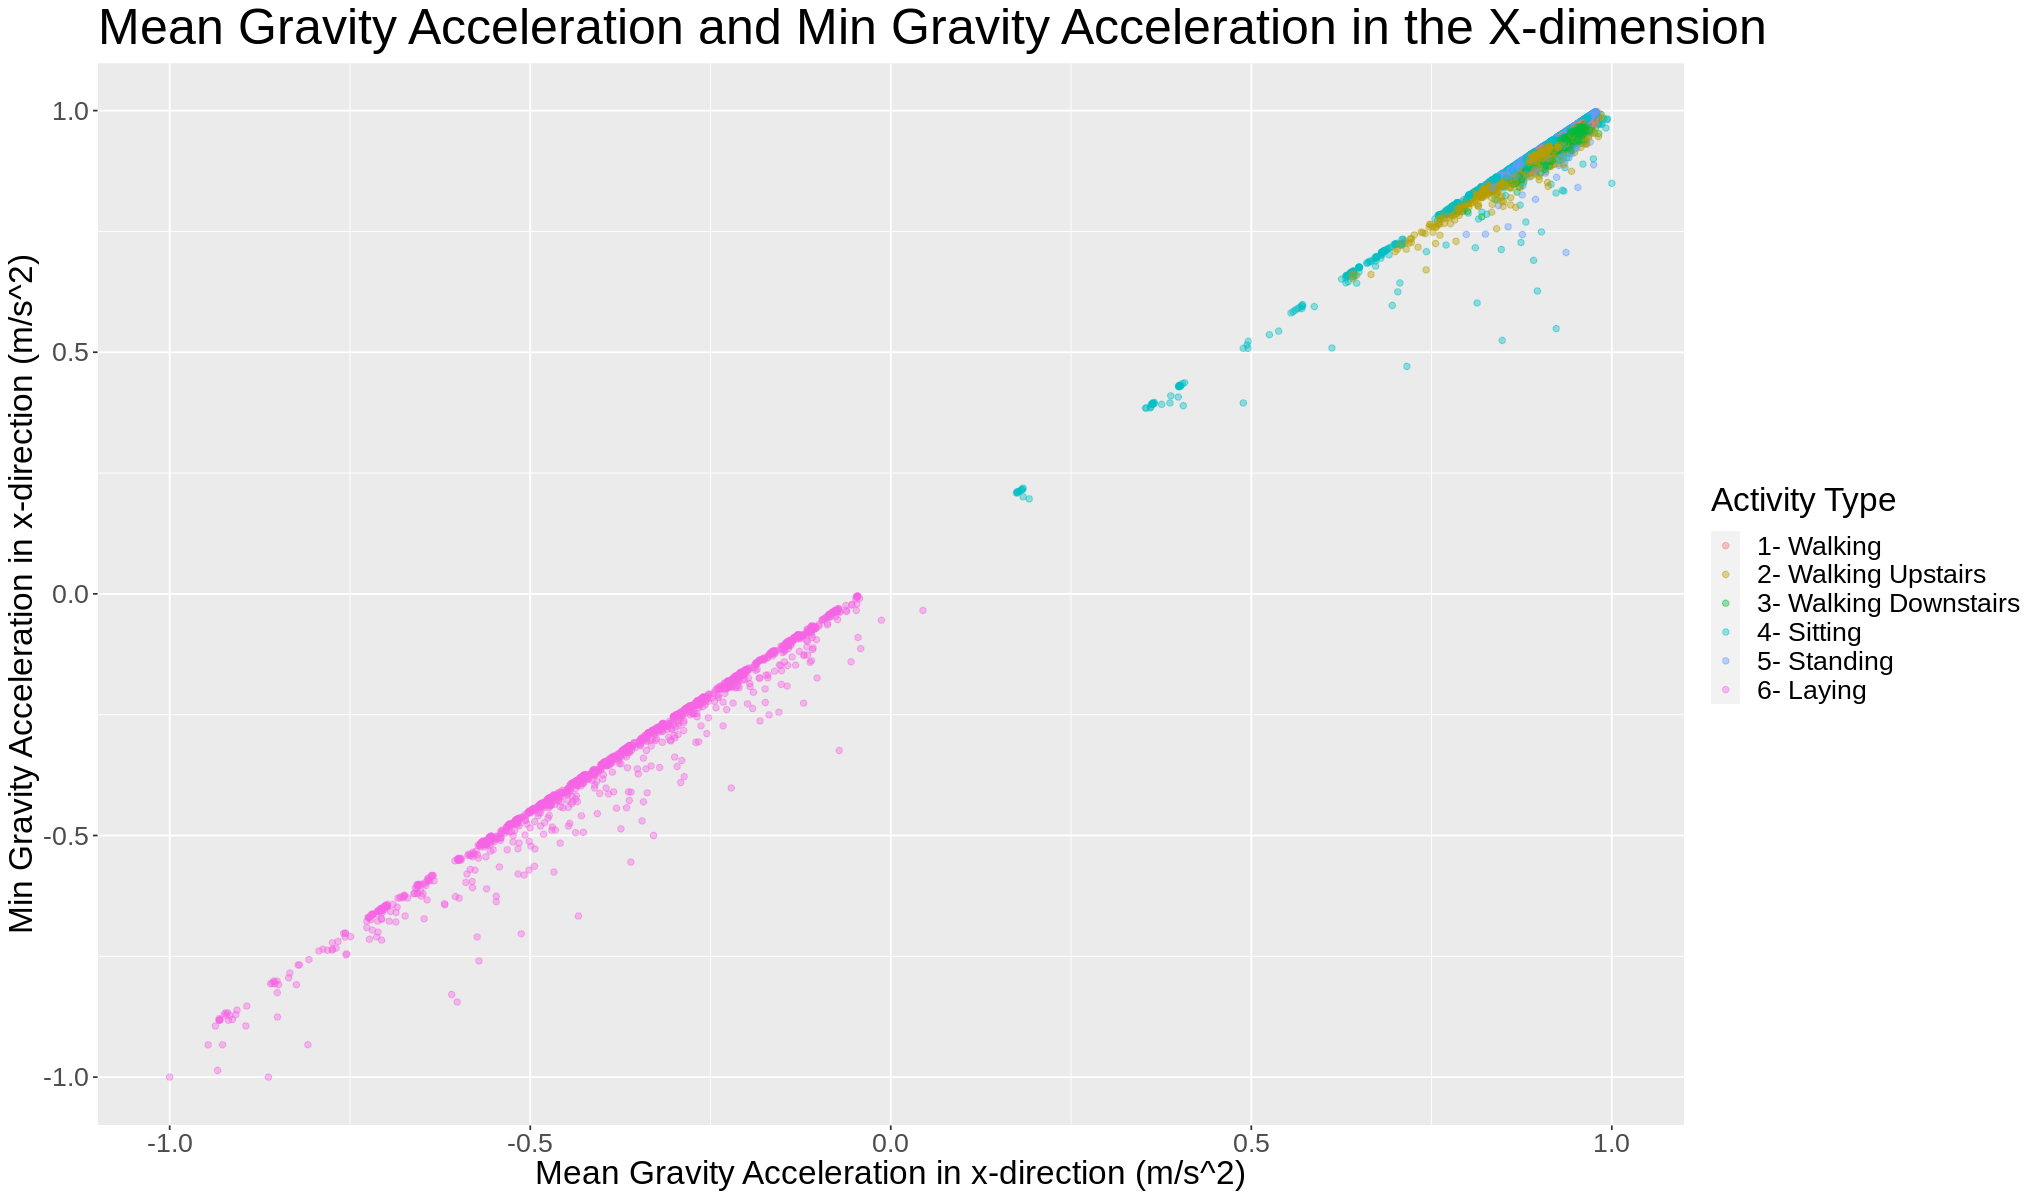

In [24]:
# Plot 2: Mean Gravity Acceleration in X-direction vs Min Gravity Acceleration in X-direction 
accl_mean_min_plot<- training_subset %>%
  ggplot(aes(x = tGravityAcc_mean_X, y = tGravityAcc_min_X, color = activity_label)) +
  ggtitle("Mean Gravity Acceleration and Min Gravity Acceleration in the X-dimension") +
  geom_point(alpha = 0.4) +
  labs(x = "Mean Gravity Acceleration in x-direction (m/s^2)", 
       y = "Min Gravity Acceleration in x-direction (m/s^2)", color = "Activity Type") +
  scale_color_brewer(palette = "Set2") +
  scale_color_discrete(labels = c("1- Walking", "2- Walking Upstairs", "3- Walking Downstairs", "4- Sitting", "5- Standing", "6- Laying")) +
  theme(text = element_text(size = 20), plot.title = element_text(size=30))
accl_mean_min_plot

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.



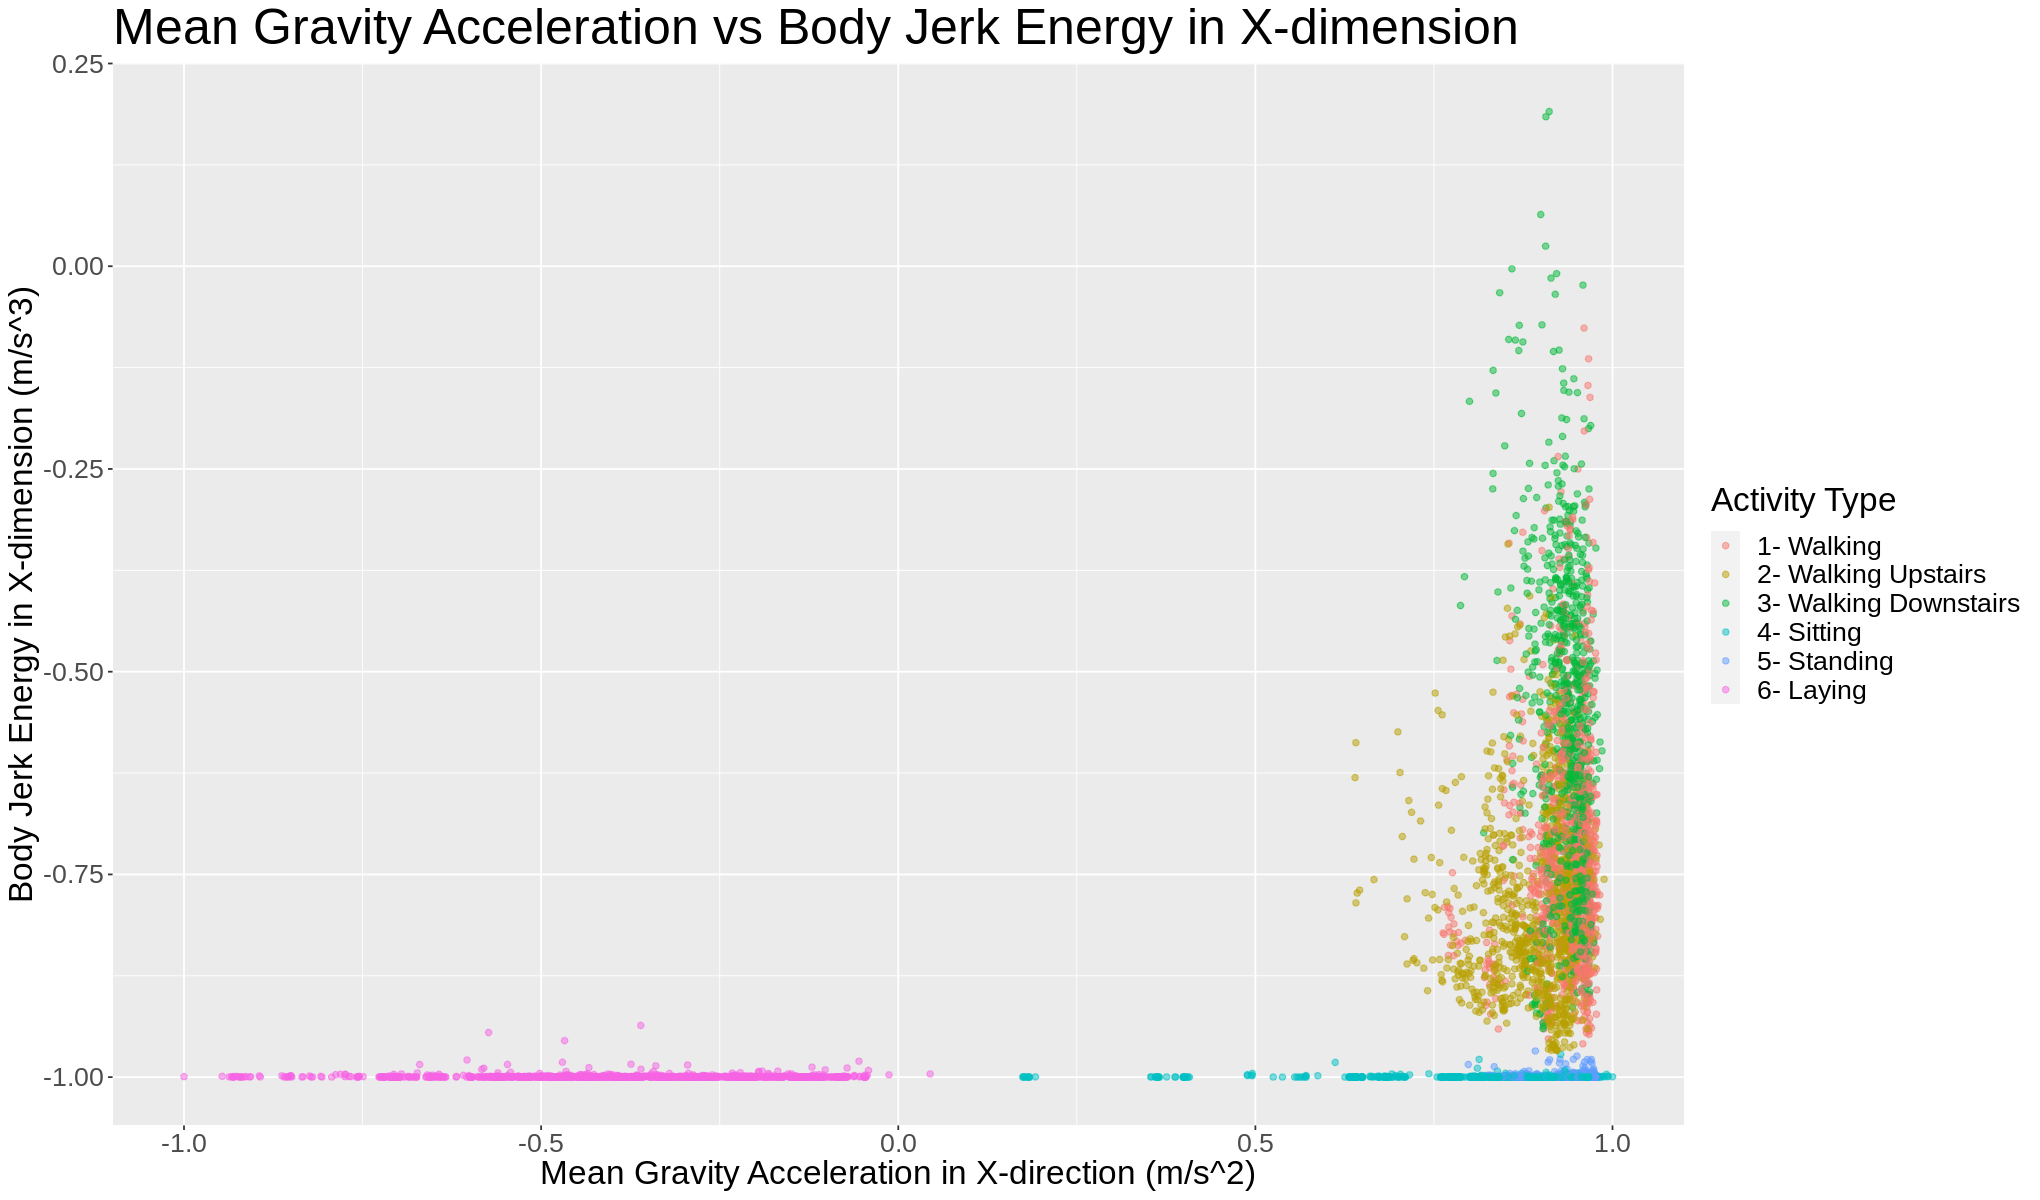

In [25]:


# Plot 3: Mean Gravity Acceleration vs Body Jerk Energy in X-dimension
mean_acc_jerk_energy_plot <- training_subset %>%
  ggplot(aes(x = tGravityAcc_mean_X, y = tBodyAccJerk_energy_X, color = activity_label)) +
  ggtitle("Mean Gravity Acceleration vs Body Jerk Energy in X-dimension") +
  geom_point(alpha = 0.5) +
  labs(x = "Mean Gravity Acceleration in X-direction (m/s^2)", y = "Body Jerk Energy in X-dimension (m/s^3)", color = "Activity Type") +
  scale_color_brewer(palette = "Set2") +
  scale_color_discrete(labels = c("1- Walking", "2- Walking Upstairs", "3- Walking Downstairs", "4- Sitting", "5- Standing", "6- Laying")) +
  theme(text = element_text(size = 20), plot.title = element_text(size=30))
mean_acc_jerk_energy_plot

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.



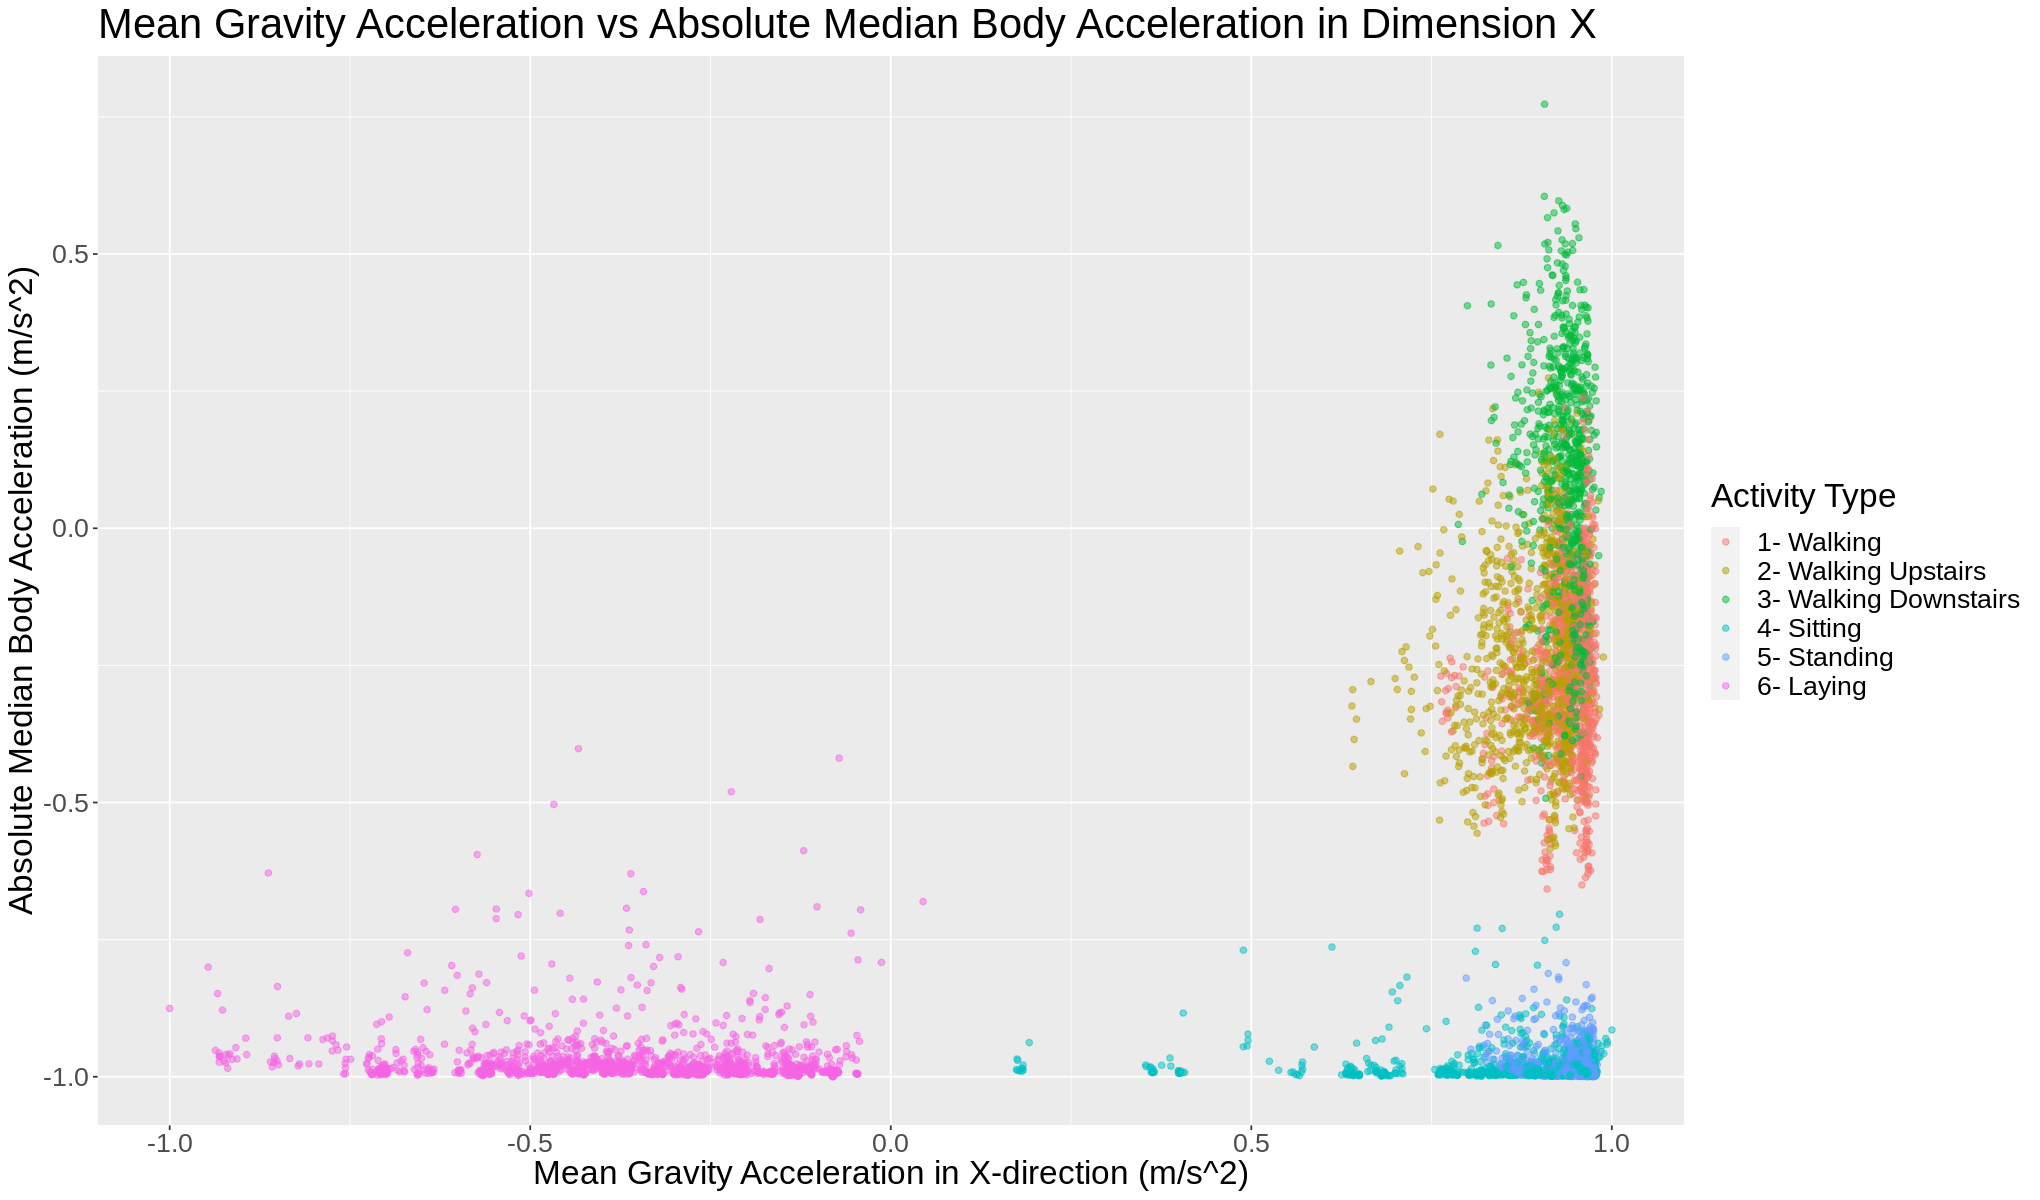

In [29]:
#tGravityAcc_mean_X	tGravityAcc_mean_Y	tGravityAcc_min_X	tBodyAccJerk_energy_X	fBodyAcc_mad_X

#Plot 4: Mean Gravity Acceleration vs Absolute Median Body Acceleration in Dimension X 
mean_acc_med_acc_plot <- training_subset %>%
  ggplot(aes(x = tGravityAcc_mean_X, y = fBodyAcc_mad_X, color = activity_label)) +
  ggtitle("Mean Gravity Acceleration vs Absolute Median Body Acceleration in Dimension X ") +
  geom_point(alpha = 0.5) +
  labs(x = "Mean Gravity Acceleration in X-direction (m/s^2)", y = "Absolute Median Body Acceleration (m/s^2)", color = "Activity Type") +
  scale_color_brewer(palette = "Set2") +
  scale_color_discrete(labels = c("1- Walking", "2- Walking Upstairs", "3- Walking Downstairs", "4- Sitting", "5- Standing", "6- Laying")) +
  theme(text = element_text(size = 20), plot.title = element_text(size=25))
mean_acc_med_acc_plot

### V. Perform Data Analysis

In [30]:
# Activity Labels 
#1 WALKING
#2 WALKING_UPSTAIRS
#3 WALKING_DOWNSTAIRS
#4 SITTING
#5 STANDING
#6 LAYING

#Create KNN model using K = 3
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 3) %>% 
  set_engine("kknn") %>% 
  set_mode("classification")
knn_spec

#Create recipe (scaling needed with new predictors)
recipe <- recipe(activity_label ~. , data = training_subset) %>% 
  step_center(all_predictors()) %>% 
  step_scale(all_predictors())  
recipe

#Create workflow 
knn_fit <- workflow() %>% 
  add_recipe(recipe) %>% 
  add_model(knn_spec) %>% 
  fit(data = training_subset)
knn_fit

K-Nearest Neighbor Model Specification (classification)

Main Arguments:
  neighbors = 3
  weight_func = rectangular

Computational engine: kknn 


Data Recipe

Inputs:

      role #variables
   outcome          1
 predictor          5

Operations:

Centering for all_predictors()
Scaling for all_predictors()

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

● step_center()
● step_scale()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = ~3, kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.1074079
Best kernel: rectangular
Best k: 3

In [31]:
#Prediction 
activity_predictions <- predict(knn_fit, activity_test) %>%
      bind_cols(activity_test)
activity_predictions

.pred_class,tBodyAcc_mean_X,tBodyAcc_mean_Y,tBodyAcc_mean_Z,tBodyAcc_std_X,tBodyAcc_std_Y,tBodyAcc_std_Z,tBodyAcc_mad_X,tBodyAcc_mad_Y,tBodyAcc_mad_Z,⋯,fBodyBodyGyroJerkMag_skewness,fBodyBodyGyroJerkMag_kurtosis,"angletBodyAccMean,gravity","angletBodyAccJerkMean,gravityMean","angletBodyGyroMean,gravityMean","angletBodyGyroJerkMean,gravityMean","angleX,gravityMean","angleY,gravityMean","angleZ,gravityMean",activity_label
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<fct>
5,0.2796531,-0.019467156,-0.11346169,-0.9953796,-0.96718701,-0.9789440,-0.9965199,-0.96366837,-0.9774686,⋯,-0.39074815,-7.6010372e-001,-1.1855926e-001,1.7789948e-001,1.0069921e-001,8.0852908e-001,-8.4893347e-001,1.8063731e-001,-4.9117815e-002,5
5,0.2794539,-0.019640776,-0.11002215,-0.9969210,-0.96718593,-0.9831178,-0.9970027,-0.96609671,-0.9831163,⋯,-0.21719818,-5.6443048e-001,-2.1275406e-001,-2.3062193e-001,1.4636690e-002,-1.8951153e-001,-8.5215025e-001,1.8216997e-001,-4.3009987e-002,5
5,0.2762282,-0.021441302,-0.10820234,-0.9982460,-0.98721376,-0.9927266,-0.9982513,-0.98599654,-0.9931819,⋯,-0.61101364,-8.7836268e-001,1.7609637e-003,-6.5980273e-002,5.7886112e-001,-6.5194513e-001,-8.5272340e-001,1.8605036e-001,-3.5852089e-002,5
5,0.2771750,-0.014712802,-0.10675647,-0.9991883,-0.99052638,-0.9933650,-0.9992114,-0.99068725,-0.9921675,⋯,-0.56409980,-7.6590135e-001,1.0562047e-001,-9.0277545e-002,-1.3240280e-001,4.9881419e-001,-8.4977267e-001,1.8881220e-001,-3.5063399e-002,5
5,0.2792035,-0.023020143,-0.12208028,-0.9968390,-0.97484812,-0.9833855,-0.9970939,-0.97333193,-0.9840653,⋯,-0.78213651,-9.5352020e-001,-1.2185222e-001,-2.9076714e-002,-1.3034217e-002,-5.6927156e-002,-7.6110079e-001,2.6311858e-001,2.4172110e-002,5
5,0.2756763,-0.021264234,-0.11080122,-0.9978621,-0.99009076,-0.9945926,-0.9983334,-0.98947266,-0.9944845,⋯,-0.70196994,-8.9511812e-001,-3.2337498e-002,-3.0129838e-001,1.3257596e-001,-2.2379316e-002,-7.6150888e-001,2.6255006e-001,2.9639170e-002,5
5,0.2757344,-0.018018840,-0.10677578,-0.9992550,-0.99366888,-0.9941888,-0.9994065,-0.99362014,-0.9935829,⋯,-0.82491892,-9.6440686e-001,2.3106031e-001,4.2928253e-001,6.8115429e-001,8.1522562e-001,-7.6370208e-001,2.6110336e-001,2.8562963e-002,5
4,0.3036893,-0.004242805,-0.15085028,-0.9565033,-0.83867155,-0.9430095,-0.9620059,-0.84482083,-0.9371947,⋯,-0.17681171,-5.4858082e-001,-1.2337932e-002,9.4622460e-002,2.9126625e-002,-1.3424521e-001,-3.0588411e-001,-2.1333904e-001,-3.3700092e-001,4
4,0.2907597,-0.024034760,-0.11673889,-0.9773745,-0.96384053,-0.9625050,-0.9776306,-0.95938205,-0.9622540,⋯,-0.50812728,-8.6266897e-001,9.6193097e-002,-1.3137498e-001,7.7639880e-002,-3.7327157e-002,-3.0919487e-001,-2.2111662e-001,-3.2645795e-001,4


In [32]:
#Classifier's Accuracy 
activity_prediction_accuracy <- activity_predictions %>%
        metrics(truth = activity_label, estimate = .pred_class)  
activity_prediction_accuracy


#Confusion matrix
activity_mat <- activity_predictions %>% 
      conf_mat(truth = activity_label, estimate = .pred_class)
activity_mat

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,multiclass,0.8990324
kap,multiclass,0.8778746


          Truth
Prediction   1   2   3   4   5   6
         1 334  41  26   0   0   0
         2  22 262  24   0   0   0
         3  21  20 228   0   0   0
         4   0   0   0 397  40   0
         5   0   0   0  46 436   0
         6   0   0   0   0   0 480

In [33]:
#10-fold cross-validation 
activity_vfold <- vfold_cv(training_subset, v = 10, strata = activity_label)

#Perform workflow analysis again 
activity_resample_fit <- workflow() %>%
      add_recipe(recipe) %>%
      add_model(knn_spec) %>%
      fit_resamples(resamples = activity_vfold)

#Accuracy of classifier's validation across the folds
activity_metrics <- activity_resample_fit %>% 
    collect_metrics()
activity_metrics

.metric,.estimator,mean,n,std_err
<chr>,<chr>,<dbl>,<int>,<dbl>
accuracy,multiclass,0.8910416,10,0.003307273
roc_auc,hand_till,0.9649022,10,0.001226661


In [34]:
#Create new K-nearest neighbours model specification to tune K value 
knn_tune <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>%
      set_engine("kknn") %>%
      set_mode("classification")
knn_tune

K-Nearest Neighbor Model Specification (classification)

Main Arguments:
  neighbors = tune()
  weight_func = rectangular

Computational engine: kknn 


In [35]:
#Create new workflow with recipe and new knn_tune specification 
knn_results <- workflow() %>%
      add_recipe(recipe) %>%
      add_model(knn_tune) %>%
      tune_grid(resamples = activity_vfold, grid = 10) %>%
      collect_metrics()
knn_results

neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
2,accuracy,multiclass,0.8913227,10,0.0038024072,Model01
2,roc_auc,hand_till,0.9554485,10,0.0017629488,Model01
3,accuracy,multiclass,0.8910416,10,0.0033072730,Model02
3,roc_auc,hand_till,0.9649022,10,0.0012266606,Model02
5,accuracy,multiclass,0.8904883,10,0.0030376349,Model03
5,roc_auc,hand_till,0.9753627,10,0.0012108576,Model03
6,accuracy,multiclass,0.8913294,10,0.0032779771,Model04
6,roc_auc,hand_till,0.9770044,10,0.0011761068,Model04
7,accuracy,multiclass,0.8885227,10,0.0027368897,Model05


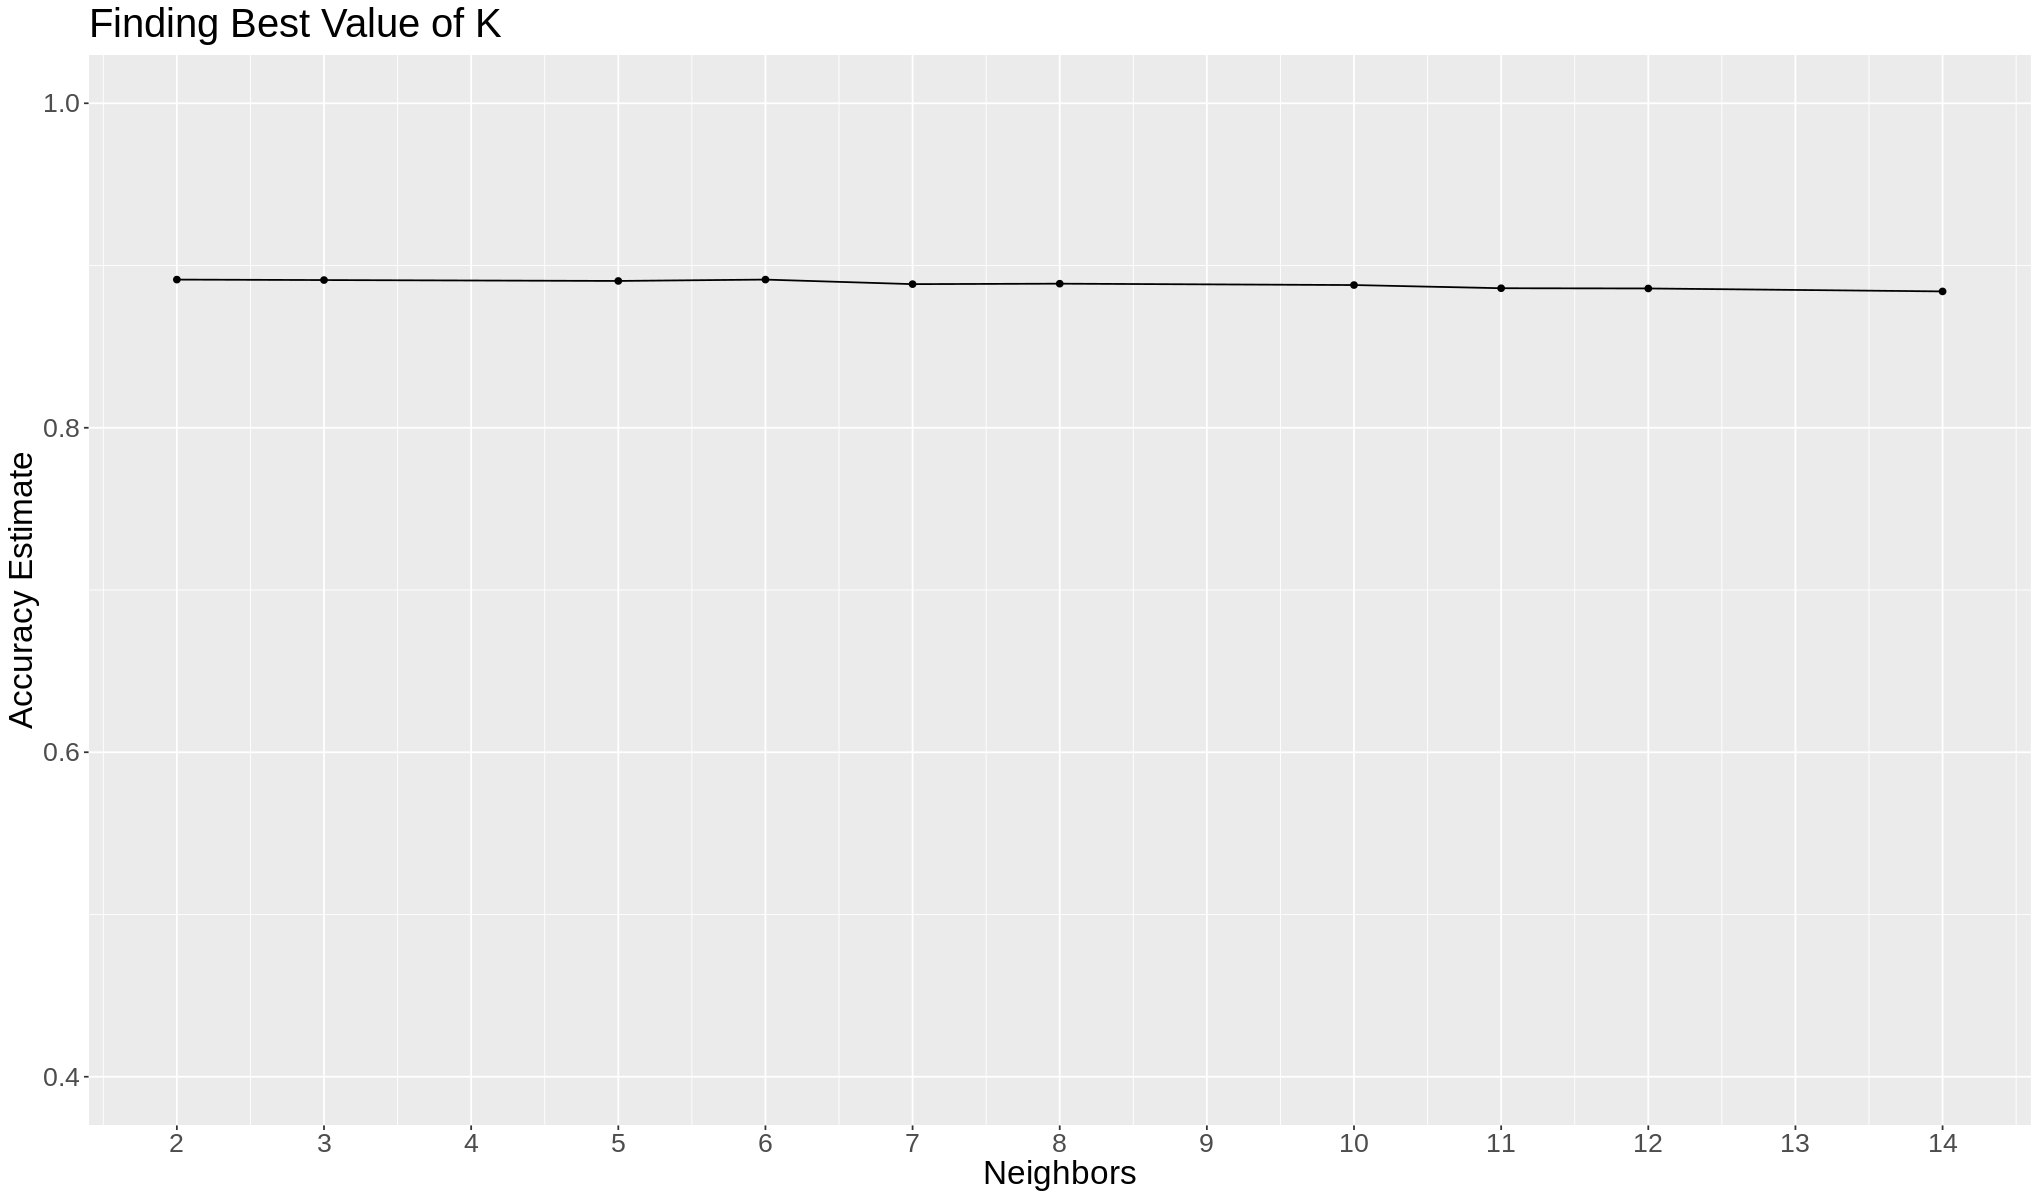

In [36]:
#Find best value of number of neighbours 
accuracies <- knn_results %>% 
      filter(.metric == "accuracy")

#Plot mean vs neighbours using accuracies dataset 
accuracy_versus_k <- ggplot(accuracies, aes(x = neighbors, y = mean))+
      geom_point() +
      geom_line() +
      labs(x = "Neighbors", y = "Accuracy Estimate") +
      scale_x_continuous(breaks = seq(0, 15, by = 1)) +  # adjusting the x-axis
      scale_y_continuous(limits = c(0.4, 1.0)) + # adjusting the y-axis 
      theme(text = element_text(size = 20)) +
      ggtitle("Finding Best Value of K")
accuracy_versus_k

In [37]:
#Create new KNN model using K = 6
knn_spec_new <- nearest_neighbor(weight_func = "rectangular", neighbors = 6) %>% 
  set_engine("kknn") %>% 
  set_mode("classification")

#Create workflow 
knn_fit <- workflow() %>% 
  add_recipe(recipe) %>% 
  add_model(knn_spec_new) %>% 
  fit(data = training_subset)

#Prediction 
activity_predictions <- predict(knn_fit, activity_test) %>%
      bind_cols(activity_test)
activity_predictions

#Classifier's Accuracy 
activity_prediction_accuracy <- activity_predictions %>%
        metrics(truth = activity_label, estimate = .pred_class)  
activity_prediction_accuracy

#Confusion matrix
activity_mat_new <- activity_predictions %>% 
      conf_mat(truth = activity_label, estimate = .pred_class)
activity_mat_new

.pred_class,tBodyAcc_mean_X,tBodyAcc_mean_Y,tBodyAcc_mean_Z,tBodyAcc_std_X,tBodyAcc_std_Y,tBodyAcc_std_Z,tBodyAcc_mad_X,tBodyAcc_mad_Y,tBodyAcc_mad_Z,⋯,fBodyBodyGyroJerkMag_skewness,fBodyBodyGyroJerkMag_kurtosis,"angletBodyAccMean,gravity","angletBodyAccJerkMean,gravityMean","angletBodyGyroMean,gravityMean","angletBodyGyroJerkMean,gravityMean","angleX,gravityMean","angleY,gravityMean","angleZ,gravityMean",activity_label
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<fct>
5,0.2796531,-0.019467156,-0.11346169,-0.9953796,-0.96718701,-0.9789440,-0.9965199,-0.96366837,-0.9774686,⋯,-0.39074815,-7.6010372e-001,-1.1855926e-001,1.7789948e-001,1.0069921e-001,8.0852908e-001,-8.4893347e-001,1.8063731e-001,-4.9117815e-002,5
5,0.2794539,-0.019640776,-0.11002215,-0.9969210,-0.96718593,-0.9831178,-0.9970027,-0.96609671,-0.9831163,⋯,-0.21719818,-5.6443048e-001,-2.1275406e-001,-2.3062193e-001,1.4636690e-002,-1.8951153e-001,-8.5215025e-001,1.8216997e-001,-4.3009987e-002,5
5,0.2762282,-0.021441302,-0.10820234,-0.9982460,-0.98721376,-0.9927266,-0.9982513,-0.98599654,-0.9931819,⋯,-0.61101364,-8.7836268e-001,1.7609637e-003,-6.5980273e-002,5.7886112e-001,-6.5194513e-001,-8.5272340e-001,1.8605036e-001,-3.5852089e-002,5
5,0.2771750,-0.014712802,-0.10675647,-0.9991883,-0.99052638,-0.9933650,-0.9992114,-0.99068725,-0.9921675,⋯,-0.56409980,-7.6590135e-001,1.0562047e-001,-9.0277545e-002,-1.3240280e-001,4.9881419e-001,-8.4977267e-001,1.8881220e-001,-3.5063399e-002,5
5,0.2792035,-0.023020143,-0.12208028,-0.9968390,-0.97484812,-0.9833855,-0.9970939,-0.97333193,-0.9840653,⋯,-0.78213651,-9.5352020e-001,-1.2185222e-001,-2.9076714e-002,-1.3034217e-002,-5.6927156e-002,-7.6110079e-001,2.6311858e-001,2.4172110e-002,5
5,0.2756763,-0.021264234,-0.11080122,-0.9978621,-0.99009076,-0.9945926,-0.9983334,-0.98947266,-0.9944845,⋯,-0.70196994,-8.9511812e-001,-3.2337498e-002,-3.0129838e-001,1.3257596e-001,-2.2379316e-002,-7.6150888e-001,2.6255006e-001,2.9639170e-002,5
5,0.2757344,-0.018018840,-0.10677578,-0.9992550,-0.99366888,-0.9941888,-0.9994065,-0.99362014,-0.9935829,⋯,-0.82491892,-9.6440686e-001,2.3106031e-001,4.2928253e-001,6.8115429e-001,8.1522562e-001,-7.6370208e-001,2.6110336e-001,2.8562963e-002,5
4,0.3036893,-0.004242805,-0.15085028,-0.9565033,-0.83867155,-0.9430095,-0.9620059,-0.84482083,-0.9371947,⋯,-0.17681171,-5.4858082e-001,-1.2337932e-002,9.4622460e-002,2.9126625e-002,-1.3424521e-001,-3.0588411e-001,-2.1333904e-001,-3.3700092e-001,4
4,0.2907597,-0.024034760,-0.11673889,-0.9773745,-0.96384053,-0.9625050,-0.9776306,-0.95938205,-0.9622540,⋯,-0.50812728,-8.6266897e-001,9.6193097e-002,-1.3137498e-001,7.7639880e-002,-3.7327157e-002,-3.0919487e-001,-2.2111662e-001,-3.2645795e-001,4


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,multiclass,0.8994531
kap,multiclass,0.8783661


          Truth
Prediction   1   2   3   4   5   6
         1 338  42  28   0   0   0
         2  20 264  19   0   0   0
         3  19  17 231   0   0   0
         4   0   0   0 390  41   0
         5   0   0   0  53 435   0
         6   0   0   0   0   0 480

**Classifier's Accuracy ~ 90%**